# Predicting Oscar Best Picture Winners

# Data Selection and Preprocessing

In [1]:
import pandas as pd
pd.set_option("display.max_columns",None)

In [2]:


# Read the TSV file into a DataFrame
df = pd.read_csv('names.tsv', delimiter='\t')

# Display the DataFrame
print(df.head())


      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                    primaryProfession                           knownForTitles  
0        actor,miscellaneous,producer  tt0072308,tt0050419,tt0053137,tt0027125  
1  actress,soundtrack,archive_footage  tt0037382,tt0075213,tt0117057,tt0038355  
2   actress,music_department,producer  tt0057345,tt0049189,tt0056404,tt0054452  
3       actor,writer,music_department  tt0072562,tt0077975,tt0080455,tt0078723  
4               writer,director,actor  tt0050986,tt0083922,tt0050976,tt0069467  


In [3]:
df_ratings = pd.read_csv('ratings.tsv', delimiter='\t')

# Display the DataFrame
print(df_ratings.head())

      tconst  averageRating  numVotes
0  tt0000001            5.7      2041
1  tt0000002            5.7       272
2  tt0000003            6.5      1995
3  tt0000004            5.4       178
4  tt0000005            6.2      2756


In [4]:
df_ratings

tconst  averageRating  numVotes
0        tt0000001            5.7      2041
1        tt0000002            5.7       272
2        tt0000003            6.5      1995
3        tt0000004            5.4       178
4        tt0000005            6.2      2756
...            ...            ...       ...
1423518  tt9916730            7.0        12
1423519  tt9916766            7.1        23
1423520  tt9916778            7.2        36
1423521  tt9916840            7.0         9
1423522  tt9916880            8.5         7

[1423523 rows x 3 columns]

In [5]:
'''
df_akas = pd.read_csv('akas.tsv', delimiter='\t')

# Display the DataFrame
print(df_akas.head())
'''

"\ndf_akas = pd.read_csv('akas.tsv', delimiter='\t')\n\n# Display the DataFrame\nprint(df_akas.head())\n"

In [6]:

df_basics = pd.read_csv('basics.tsv', delimiter='\t')

# Display the DataFrame
print(df_basics.head())


C:\Users\chubb\AppData\Local\Temp\ipykernel_24092\2778848409.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basics = pd.read_csv('basics.tsv', delimiter='\t')


      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  


In [7]:
df_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10680368 entries, 0 to 10680367
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 733.4+ MB


In [8]:
df_basics.describe()

tconst  titleType  primaryTitle originalTitle   isAdult startYear  \
count    10680368   10680368      10680350      10680350  10680368  10680368   
unique   10680368         11       4808344       4831888        30       153   
top     tt0000001  tvEpisode  Episode #1.1  Episode #1.1         0        \N   
freq            1    8170871         51228         51228  10275756   1401354   

         endYear runtimeMinutes    genres  
count   10680368       10680368  10680148  
unique        97            899      2371  
top           \N             \N     Drama  
freq    10558701        7363539   1219254

In [9]:
# Check for duplicate rows
duplicates = df_basics.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [10]:
df_basics.shape

(10680368, 9)

In [11]:
#df_basics['titleType'].unique()

In [12]:
# Assuming df_basics is your DataFrame containing the 'primaryTitle' column

df_ifilms = df_basics['primaryTitle'].drop_duplicates().reset_index(drop=True)

print(df_ifilms)


0                                                 Carmencita
1                                     Le clown et ses chiens
2                                             Pauvre Pierrot
3                                                Un bon bock
4                                           Blacksmith Scene
                                 ...                        
4808340    Talent Coaching with IMOR's Bianca Desmore Mit...
4808341                                        Tinne Oltmans
4808342                                         Luc Janssens
4808343                           Horrid Henry's Comic Caper
4808344                            Horrid Henry Knows It All
Name: primaryTitle, Length: 4808345, dtype: object


In [13]:
# Print the column names of df_basics
df_ifilms = pd.DataFrame(df_ifilms)

print(df_ifilms.columns)

Index(['primaryTitle'], dtype='object')


In [14]:
# Read the CSV file into a DataFrame
df_oscars = pd.read_csv('the_oscar_award.csv')

# Display the DataFrame
print(df_oscars)


       year_film  year_ceremony  ceremony                          category  \
0           1927           1928         1                             ACTOR   
1           1927           1928         1                             ACTOR   
2           1927           1928         1                           ACTRESS   
3           1927           1928         1                           ACTRESS   
4           1927           1928         1                           ACTRESS   
...          ...            ...       ...                               ...   
10884       2023           2024        96     WRITING (Original Screenplay)   
10885       2023           2024        96  JEAN HERSHOLT HUMANITARIAN AWARD   
10886       2023           2024        96                    HONORARY AWARD   
10887       2023           2024        96                    HONORARY AWARD   
10888       2023           2024        96                    HONORARY AWARD   

                                                   

In [15]:
df_oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10889 entries, 0 to 10888
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year_film      10889 non-null  int64 
 1   year_ceremony  10889 non-null  int64 
 2   ceremony       10889 non-null  int64 
 3   category       10889 non-null  object
 4   name           10884 non-null  object
 5   film           10570 non-null  object
 6   winner         10889 non-null  bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 521.2+ KB


In [16]:
df_oscars.describe()

year_film  year_ceremony      ceremony
count  10889.000000   10889.000000  10889.000000
mean    1976.608596    1977.608596     49.633024
std       27.358261      27.358261     27.316863
min     1927.000000    1928.000000      1.000000
25%     1952.000000    1953.000000     25.000000
50%     1976.000000    1977.000000     49.000000
75%     2001.000000    2002.000000     74.000000
max     2023.000000    2024.000000     96.000000

In [17]:
df_oscars.shape

(10889, 7)

In [18]:
# Check for duplicate rows
duplicates = df_oscars.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 7


In [19]:
df_oscars.head(50)


year_film  year_ceremony  ceremony                      category  \
0        1927           1928         1                         ACTOR   
1        1927           1928         1                         ACTOR   
2        1927           1928         1                       ACTRESS   
3        1927           1928         1                       ACTRESS   
4        1927           1928         1                       ACTRESS   
5        1927           1928         1                 ART DIRECTION   
6        1927           1928         1                 ART DIRECTION   
7        1927           1928         1                 ART DIRECTION   
8        1927           1928         1                CINEMATOGRAPHY   
9        1927           1928         1                CINEMATOGRAPHY   
10       1927           1928         1                CINEMATOGRAPHY   
11       1927           1928         1    DIRECTING (Comedy Picture)   
12       1927           1928         1    DIRECTING (Comedy Picture)   
13       1927           1928         1  DIRECTING (Dramatic Picture)   
14       1927           1928         1  DIRECTING (Dramatic Picture)   
15       1927           1928         1  DIRECTING (Dramatic Picture)   
16       1927           1928         1           ENGINEERING EFFECTS   
17       1927           1928         1           ENGINEERING EFFECTS   
18       1927           1928         1           ENGINEERING EFFECTS   
19       1927           1928         1           OUTSTANDING PICTURE   
20       1927           1928         1           OUTSTANDING PICTURE   
21       1927           1928         1           OUTSTANDING PICTURE   
22       1927           1928         1   UNIQUE AND ARTISTIC PICTURE   
23       1927           1928         1   UNIQUE AND ARTISTIC PICTURE   
24       1927           1928         1   UNIQUE AND ARTISTIC PICTURE   
25       1927           1928         1          WRITING (Adaptation)   
26       1927           1928         1          WRITING (Adaptation)   
27       1927           1928         1          WRITING (Adaptation)   
28       1927           1928         1      WRITING (Original Story)   
29       1927           1928         1      WRITING (Original Story)   
30       1927           1928         1       WRITING (Title Writing)   
31       1927           1928         1       WRITING (Title Writing)   
32       1927           1928         1       WRITING (Title Writing)   
33       1927           1928         1                 SPECIAL AWARD   
34       1927           1928         1                 SPECIAL AWARD   
35       1928           1929         2                         ACTOR   
36       1928           1929         2                         ACTOR   
37       1928           1929         2                         ACTOR   
38       1928           1929         2                         ACTOR   
39       1928           1929         2                         ACTOR   
40       1928           1929         2                       ACTRESS   
41       1928           1929         2                       ACTRESS   
42       1928           1929         2                       ACTRESS   
43       1928           1929         2                       ACTRESS   
44       1928           1929         2                       ACTRESS   
45       1928           1929         2                       ACTRESS   
46       1928           1929         2                 ART DIRECTION   
47       1928           1929         2                 ART DIRECTION   
48       1928           1929         2                 ART DIRECTION   
49       1928           1929         2                 ART DIRECTION   

                       name                               film  winner  
0       Richard Barthelmess                          The Noose   False  
1             Emil Jannings                   The Last Command    True  
2            Louise Dresser                    A Ship Comes In   False  
3              Janet Gaynor            

In [20]:
df_oscars['film'].nunique()

5041

In [21]:
df_oscars[df_oscars['film']=='12 Years a Slave']

year_film  year_ceremony  ceremony                      category  \
9517       2013           2014        86       ACTOR IN A LEADING ROLE   
9521       2013           2014        86    ACTOR IN A SUPPORTING ROLE   
9531       2013           2014        86  ACTRESS IN A SUPPORTING ROLE   
9548       2013           2014        86                COSTUME DESIGN   
9552       2013           2014        86                     DIRECTING   
9568       2013           2014        86                  FILM EDITING   
9594       2013           2014        86                  BEST PICTURE   
9600       2013           2014        86             PRODUCTION DESIGN   
9629       2013           2014        86  WRITING (Adapted Screenplay)   

                                                   name              film  \
9517                                   Chiwetel Ejiofor  12 Years a Slave   
9521                                 Michael Fassbender  12 Years a Slave   
9531                                     Lupita Nyong'o  12 Years a Slave   
9548                                    Patricia Norris  12 Years a Slave   
9552                                      Steve McQueen  12 Years a Slave   
9568                                         Joe Walker  12 Years a Slave   
9594  Brad Pitt, Dede Gardner, Jeremy Kleiner, Steve...  12 Years a Slave   
9600  Production Design: Adam Stockhausen; Set Decor...  12 Years a Slave   
9629                          Screenplay by John Ridley  12 Years a Slave   

      winner  
9517   False  
9521   False  
9531    True  
9548   False  
9552   False  
9568   False  
9594    True  
9600   False  
9629    True

In [22]:
df_oscars[df_oscars['category']=='BEST PICTURE']

year_film  year_ceremony  ceremony      category  \
3923        1962           1963        35  BEST PICTURE   
3924        1962           1963        35  BEST PICTURE   
3925        1962           1963        35  BEST PICTURE   
3926        1962           1963        35  BEST PICTURE   
3927        1962           1963        35  BEST PICTURE   
...          ...            ...       ...           ...   
10845       2023           2024        96  BEST PICTURE   
10846       2023           2024        96  BEST PICTURE   
10847       2023           2024        96  BEST PICTURE   
10848       2023           2024        96  BEST PICTURE   
10849       2023           2024        96  BEST PICTURE   

                                                    name  \
3923                               Sam Spiegel, Producer   
3924                          Darryl F. Zanuck, Producer   
3925                           Morton Da Costa, Producer   
3926                           Aaron Rosenberg, Producer   
3927                            Alan J. Pakula, Producer   
...                                                  ...   
10845  Bradley Cooper, Steven Spielberg, Fred Berner,...   
10846  Emma Thomas, Charles Roven and Christopher Nol...   
10847  David Hinojosa, Christine Vachon and Pamela Ko...   
10848  Ed Guiney, Andrew Lowe, Yorgos Lanthimos and E...   
10849                             James Wilson, Producer   

                                   film  winner  
3923                 Lawrence of Arabia    True  
3924                    The Longest Day   False  
3925   Meredith Willson's The Music Man   False  
3926               Mutiny on the Bounty   False  
3927              To Kill a Mockingbird   False  
...                                 ...     ...  
10845                           Maestro   False  
10846                       Oppenheimer    True  
10847                        Past Lives   False  
10848                       Poor Things   False  
10849              The Zone of Interest   False  

[371 rows x 7 columns]

In [23]:
# Assuming df_oscars is your DataFrame
df_oscars_bestpicture=df_oscars
# Define a function to apply to each row
def is_best_picture(row):
    if row['category'] == 'BEST PICTURE' and row['winner'] == True:
        return 1
    else:
        return 0

# Apply the function to create the new column
df_oscars_bestpicture['is_best_picture'] = df_oscars_bestpicture.apply(lambda row: is_best_picture(row), axis=1)


In [24]:
df_oscars_bestpicture.head(10)

year_film  year_ceremony  ceremony        category  \
0       1927           1928         1           ACTOR   
1       1927           1928         1           ACTOR   
2       1927           1928         1         ACTRESS   
3       1927           1928         1         ACTRESS   
4       1927           1928         1         ACTRESS   
5       1927           1928         1   ART DIRECTION   
6       1927           1928         1   ART DIRECTION   
7       1927           1928         1   ART DIRECTION   
8       1927           1928         1  CINEMATOGRAPHY   
9       1927           1928         1  CINEMATOGRAPHY   

                      name               film  winner  is_best_picture  
0      Richard Barthelmess          The Noose   False                0  
1            Emil Jannings   The Last Command    True                0  
2           Louise Dresser    A Ship Comes In   False                0  
3             Janet Gaynor         7th Heaven    True                0  
4           Gloria Swanson     Sadie Thompson   False                0  
5            Rochus Gliese            Sunrise   False                0  
6  William Cameron Menzies          The Dove;    True                0  
7             Harry Oliver         7th Heaven   False                0  
8            George Barnes  The Devil Dancer;   False                0  
9           Charles Rosher            Sunrise    True                0

In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [26]:
import pandas as pd

oscars_info=df_oscars_bestpicture

# One-hot encode categories for nominations
category_nomination_onehot = pd.get_dummies(oscars_info['category'], prefix='nomination')

# One-hot encode categories for wins
category_wins_onehot = pd.get_dummies(oscars_info['category'], prefix='win')
category_wins_onehot *= oscars_info['winner'].astype(int)  # Multiply by 'winner' column (True: 1, False: 0) to zero out non-winning categories

# Concatenate one-hot encoded DataFrames with the original DataFrame
oscars_info = pd.concat([oscars_info, category_nomination_onehot, category_wins_onehot], axis=1)

# Drop original 'category' and 'winner' columns
oscars_info.drop(['category', 'winner'], axis=1, inplace=True)

# Optionally, you can drop other columns that are not necessary for modeling or analysis

print(oscars_info.head(10))


   year_film  year_ceremony  ceremony                     name  \
0       1927           1928         1      Richard Barthelmess   
1       1927           1928         1            Emil Jannings   
2       1927           1928         1           Louise Dresser   
3       1927           1928         1             Janet Gaynor   
4       1927           1928         1           Gloria Swanson   
5       1927           1928         1            Rochus Gliese   
6       1927           1928         1  William Cameron Menzies   
7       1927           1928         1             Harry Oliver   
8       1927           1928         1            George Barnes   
9       1927           1928         1           Charles Rosher   

                film  is_best_picture  nomination_ACTOR  \
0          The Noose                0              True   
1   The Last Command                0              True   
2    A Ship Comes In                0             False   
3         7th Heaven                0

In [27]:
oscars_info

year_film  year_ceremony  ceremony  \
0           1927           1928         1   
1           1927           1928         1   
2           1927           1928         1   
3           1927           1928         1   
4           1927           1928         1   
...          ...            ...       ...   
10884       2023           2024        96   
10885       2023           2024        96   
10886       2023           2024        96   
10887       2023           2024        96   
10888       2023           2024        96   

                                                    name              film  \
0                                    Richard Barthelmess         The Noose   
1                                          Emil Jannings  The Last Command   
2                                         Louise Dresser   A Ship Comes In   
3                                           Janet Gaynor        7th Heaven   
4                                         Gloria Swanson    Sadie Thompson   
...                                                  ...               ...   
10884                             Written by Celine Song        Past Lives   
10885                                                NaN               NaN   
10886  To Angela Bassett, who has inspired audiences ...               NaN   
10887  To Mel Brooks, for his comedic brilliance, pro...               NaN   
10888  To Carol Littleton, whose commitment to her cr...               NaN   

       is_best_picture  nomination_ACTOR  nomination_ACTOR IN A LEADING ROLE  \
0                    0              True                               False   
1                    0              True                               False   
2                    0             False                               False   
3                    0             False                               False   
4                    0             False                               False   
...                ...               ...                                 ...   
10884                0             False                               False   
10885                0             False                               False   
10886                0             False                               False   
10887                0             False                               False   
10888                0             False                               False   

       nomination_ACTOR IN A SUPPORTING ROLE  nomination_ACTRESS  \
0                                      False               False   
1                                      False               False   
2                                      False                True   
3                                      False                True   
4                                      False                True   
...                                      ...                 ...   
10884                                  False               False   
10885                                  False               False   
10886                                  False               False   
10887                                  False               False   
10888                                  False               False   

       nomination_ACTRESS IN A LEADING ROLE  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
...                                     ...   
10884                                 False   
10885                                 False   
10886                                 False   
10887                                 False   
10888                                 False   

       nomination_ACTRESS IN A SUPPORTING ROLE  \
0                                        False   
1                                        False   
2                                   

In [28]:

# Assuming oscars_info is your DataFrame
# Drop rows where 'film' values are null
oscars_info = oscars_info.dropna(subset=['film'])

# Display the DataFrame after dropping rows
print(oscars_info)


       year_film  year_ceremony  ceremony  \
0           1927           1928         1   
1           1927           1928         1   
2           1927           1928         1   
3           1927           1928         1   
4           1927           1928         1   
...          ...            ...       ...   
10880       2023           2024        96   
10881       2023           2024        96   
10882       2023           2024        96   
10883       2023           2024        96   
10884       2023           2024        96   

                                                    name               film  \
0                                    Richard Barthelmess          The Noose   
1                                          Emil Jannings   The Last Command   
2                                         Louise Dresser    A Ship Comes In   
3                                           Janet Gaynor         7th Heaven   
4                                         Gloria Swanson     Sad

In [29]:
columns_to_remove = ['year_film', 'year_ceremony', 'ceremony','name']  # Replace column names with the ones you want to remove

# Drop the specified columns
oscars_info = oscars_info.drop(columns=columns_to_remove)

oscars_info.head(10)

film  is_best_picture  nomination_ACTOR  \
0          The Noose                0              True   
1   The Last Command                0              True   
2    A Ship Comes In                0             False   
3         7th Heaven                0             False   
4     Sadie Thompson                0             False   
5            Sunrise                0             False   
6          The Dove;                0             False   
7         7th Heaven                0             False   
8  The Devil Dancer;                0             False   
9            Sunrise                0             False   

   nomination_ACTOR IN A LEADING ROLE  nomination_ACTOR IN A SUPPORTING ROLE  \
0                               False                                  False   
1                               False                                  False   
2                               False                                  False   
3                               False                                  False   
4                               False                                  False   
5                               False                                  False   
6                               False                                  False   
7                               False                                  False   
8                               False                                  False   
9                               False                                  False   

   nomination_ACTRESS  nomination_ACTRESS IN A LEADING ROLE  \
0               False                                 False   
1               False                                 False   
2                True                                 False   
3                True                                 False   
4                True                                 False   
5               False                                 False   
6               False                                 False   
7               False                                 False   
8               False                                 False   
9               False                                 False   

   nomination_ACTRESS IN A SUPPORTING ROLE  nomination_ANIMATED FEATURE FILM  \
0                                    False                             False   
1                                    False                             False   
2                                    False                             False   
3                                    False                             False   
4                                    False                             False   
5                                    False                             False   
6                                    False                             False   
7                                    False                             False   
8                                    False                             False   
9                                    False                             False   

   nomination_ART DIRECTION  nomination_ART DIRECTION (Black-and-White)  \
0                     False                                       False   
1                     False                                       False   
2                     False                                       False   
3                     False                                       False   
4                     False                                       False   
5                      True                                       False   
6                      True                                       False   
7                      True                                       False   
8                     False                                       False   
9                     False                                       False   

   nomination_ART DIRECTION (Color)  nomination_ASSISTANT DIRECTOR  \
0             

In [30]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Sample DataFrame
# df_oscars_bestpicture is assumed to be your DataFrame with 'category' and 'winner' columns
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'category' column
category_encoded = encoder.fit_transform(df_oscars_bestpicture[['category']])

# Convert the array to a DataFrame with column names
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['category']))

# Create a dictionary to store winner columns for each category
winner_cols = {}

# Iterate over unique categories and add 'winner' column for each category
for category in df_oscars_bestpicture['category'].unique():
    winner_col = (df_oscars_bestpicture['category'] == category) & df_oscars_bestpicture['winner']
    winner_cols[category+'_winner'] = winner_col.astype(int)

# Concatenate all columns at once
category_encoded_df = pd.concat([category_encoded_df, pd.DataFrame(winner_cols)], axis=1)

# Concatenate the original DataFrame with the new 'category' encoded DataFrame
df_category_encoded = pd.concat([df_oscars_bestpicture, category_encoded_df], axis=1)

# Optionally, drop the original 'category' column if you don't need it anymore
df_category_encoded.drop('category', axis=1, inplace=True)

# Display the encoded DataFrame
df_category_encoded.head(10)


C:\Users\chubb\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


year_film  year_ceremony  ceremony                     name  \
0       1927           1928         1      Richard Barthelmess   
1       1927           1928         1            Emil Jannings   
2       1927           1928         1           Louise Dresser   
3       1927           1928         1             Janet Gaynor   
4       1927           1928         1           Gloria Swanson   
5       1927           1928         1            Rochus Gliese   
6       1927           1928         1  William Cameron Menzies   
7       1927           1928         1             Harry Oliver   
8       1927           1928         1            George Barnes   
9       1927           1928         1           Charles Rosher   

                film  winner  is_best_picture  category_ACTOR  \
0          The Noose   False                0             1.0   
1   The Last Command    True                0             1.0   
2    A Ship Comes In   False                0             0.0   
3         7th Heaven    True                0             0.0   
4     Sadie Thompson   False                0             0.0   
5            Sunrise   False                0             0.0   
6          The Dove;    True                0             0.0   
7         7th Heaven   False                0             0.0   
8  The Devil Dancer;   False                0             0.0   
9            Sunrise    True                0             0.0   

   category_ACTOR IN A LEADING ROLE  category_ACTOR IN A SUPPORTING ROLE  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   
5                               0.0                                  0.0   
6                               0.0                                  0.0   
7                               0.0                                  0.0   
8                               0.0                                  0.0   
9                               0.0                                  0.0   

   category_ACTRESS  category_ACTRESS IN A LEADING ROLE  \
0               0.0                                 0.0   
1               0.0                                 0.0   
2               1.0                                 0.0   
3               1.0                                 0.0   
4               1.0                                 0.0   
5               0.0                                 0.0   
6               0.0                                 0.0   
7               0.0                                 0.0   
8               0.0                                 0.0   
9               0.0                                 0.0   

   category_ACTRESS IN A SUPPORTING ROLE  category_ANIMATED FEATURE FILM  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   
5                                    0.0                             0.0   
6                                    0.0                             0.0   
7                                    0.0                             0.0   
8                                    0.0                             0.0   
9                                    0.0                             0.0   

   category_ART DIRECTION  category_ART DIRECTION (Black-and-White)  \
0                     0.0                                       0.0   
1                     0.0                                       0.0   
2                     0

In [31]:
df_category_encoded = df_category_encoded.dropna(subset=['film'])

# Display the DataFrame after dropping rows
print(df_category_encoded)

       year_film  year_ceremony  ceremony  \
0           1927           1928         1   
1           1927           1928         1   
2           1927           1928         1   
3           1927           1928         1   
4           1927           1928         1   
...          ...            ...       ...   
10880       2023           2024        96   
10881       2023           2024        96   
10882       2023           2024        96   
10883       2023           2024        96   
10884       2023           2024        96   

                                                    name               film  \
0                                    Richard Barthelmess          The Noose   
1                                          Emil Jannings   The Last Command   
2                                         Louise Dresser    A Ship Comes In   
3                                           Janet Gaynor         7th Heaven   
4                                         Gloria Swanson     Sad

In [32]:
columns_to_remove = ['year_film', 'year_ceremony', 'ceremony','winner']  # Replace column names with the ones you want to remove
#columns_to_remove = ['winner']
# Drop the specified columns
df_category_encoded = df_category_encoded.drop(columns=columns_to_remove)

df_category_encoded.head(10)

name               film  is_best_picture  \
0      Richard Barthelmess          The Noose                0   
1            Emil Jannings   The Last Command                0   
2           Louise Dresser    A Ship Comes In                0   
3             Janet Gaynor         7th Heaven                0   
4           Gloria Swanson     Sadie Thompson                0   
5            Rochus Gliese            Sunrise                0   
6  William Cameron Menzies          The Dove;                0   
7             Harry Oliver         7th Heaven                0   
8            George Barnes  The Devil Dancer;                0   
9           Charles Rosher            Sunrise                0   

   category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0             1.0                               0.0   
1             1.0                               0.0   
2             0.0                               0.0   
3             0.0                               0.0   
4             0.0                               0.0   
5             0.0                               0.0   
6             0.0                               0.0   
7             0.0                               0.0   
8             0.0                               0.0   
9             0.0                               0.0   

   category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                  0.0               0.0   
1                                  0.0               0.0   
2                                  0.0               1.0   
3                                  0.0               1.0   
4                                  0.0               1.0   
5                                  0.0               0.0   
6                                  0.0               0.0   
7                                  0.0               0.0   
8                                  0.0               0.0   
9                                  0.0               0.0   

   category_ACTRESS IN A LEADING ROLE  category_ACTRESS IN A SUPPORTING ROLE  \
0                                 0.0                                    0.0   
1                                 0.0                                    0.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   
5                                 0.0                                    0.0   
6                                 0.0                                    0.0   
7                                 0.0                                    0.0   
8                                 0.0                                    0.0   
9                                 0.0                                    0.0   

   category_ANIMATED FEATURE FILM  category_ART DIRECTION  \
0                             0.0                     0.0   
1                             0.0                     0.0   
2                             0.0                     0.0   
3                             0.0                     0.0   
4                             0.0                     0.0   
5                             0.0                     1.0   
6                             0.0                     1.0   
7                             0.0                     1.0   
8                             0.0                     0.0   
9                             0.0                     0.0   

   category_ART DIRECTION (Black-and-White)  category_ART DIRECTION (Color)  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   
5

In [33]:
df_category_encoded[df_category_encoded['is_best_picture']==1]

name  \
3923                               Sam Spiegel, Producer   
4049                           Tony Richardson, Producer   
4173                            Jack L. Warner, Producer   
4295                               Robert Wise, Producer   
4418                            Fred Zinnemann, Producer   
...                                                  ...   
10350            Kwak Sin Ae and Bong Joon Ho, Producers   
10474  Frances McDormand, Peter Spears, Mollye Asher,...   
10591  Philippe Rousselet, Fabrice Gianfermi and Patr...   
10718  Daniel Kwan, Daniel Scheinert and Jonathan Wan...   
10846  Emma Thomas, Charles Roven and Christopher Nol...   

                                    film  is_best_picture  category_ACTOR  \
3923                  Lawrence of Arabia                1             0.0   
4049                           Tom Jones                1             0.0   
4173                        My Fair Lady                1             0.0   
4295                  The Sound of Music                1             0.0   
4418               A Man for All Seasons                1             0.0   
...                                  ...              ...             ...   
10350                           Parasite                1             0.0   
10474                          Nomadland                1             0.0   
10591                               CODA                1             0.0   
10718  Everything Everywhere All at Once                1             0.0   
10846                        Oppenheimer                1             0.0   

       category_ACTOR IN A LEADING ROLE  category_ACTOR IN A SUPPORTING ROLE  \
3923                                0.0                                  0.0   
4049                                0.0                                  0.0   
4173                                0.0                                  0.0   
4295                                0.0                                  0.0   
4418                                0.0                                  0.0   
...                                 ...                                  ...   
10350                               0.0                                  0.0   
10474                               0.0                                  0.0   
10591                               0.0                                  0.0   
10718                               0.0                                  0.0   
10846                               0.0                                  0.0   

       category_ACTRESS  category_ACTRESS IN A LEADING ROLE  \
3923                0.0                                 0.0   
4049                0.0                                 0.0   
4173                0.0                                 0.0   
4295                0.0                                 0.0   
4418                0.0                                 0.0   
...                 ...                                 ...   
10350               0.0                                 0.0   
10474               0.0                                 0.0   
10591               0.0                                 0.0   
10718               0.0                                 0.0   
10846               0.0                                 0.0   

       category_ACTRESS IN A SUPPORTING ROLE  category_ANIMATED FEATURE FILM  \
3923                                     0.0                             0.0   
4049                                     0.0                             0.0   
4173                                     0.0                             0.0   
4295                                     0.0                             0.0   
4418                                     0.0                             0.0   
...                                      ...                             ...   
10350                                    0.0                             0.0   
10474                                    0.0    

In [34]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'category' column
category_encoded = encoder.fit_transform(df_oscars_bestpicture[['category']])

# Convert the array to a DataFrame with column names
category_encoded_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out(['category']))

# Concatenate the original DataFrame with the new 'category' encoded DataFrame
df_encoded = pd.concat([df_oscars_bestpicture, category_encoded_df], axis=1)

# Optionally, drop the original 'category' column if you don't need it anymore
df_encoded.drop('category', axis=1, inplace=True)




C:\Users\chubb\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
df_encoded.head(10)

year_film  year_ceremony  ceremony                     name  \
0       1927           1928         1      Richard Barthelmess   
1       1927           1928         1            Emil Jannings   
2       1927           1928         1           Louise Dresser   
3       1927           1928         1             Janet Gaynor   
4       1927           1928         1           Gloria Swanson   
5       1927           1928         1            Rochus Gliese   
6       1927           1928         1  William Cameron Menzies   
7       1927           1928         1             Harry Oliver   
8       1927           1928         1            George Barnes   
9       1927           1928         1           Charles Rosher   

                film  winner  is_best_picture  category_ACTOR  \
0          The Noose   False                0             1.0   
1   The Last Command    True                0             1.0   
2    A Ship Comes In   False                0             0.0   
3         7th Heaven    True                0             0.0   
4     Sadie Thompson   False                0             0.0   
5            Sunrise   False                0             0.0   
6          The Dove;    True                0             0.0   
7         7th Heaven   False                0             0.0   
8  The Devil Dancer;   False                0             0.0   
9            Sunrise    True                0             0.0   

   category_ACTOR IN A LEADING ROLE  category_ACTOR IN A SUPPORTING ROLE  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   
5                               0.0                                  0.0   
6                               0.0                                  0.0   
7                               0.0                                  0.0   
8                               0.0                                  0.0   
9                               0.0                                  0.0   

   category_ACTRESS  category_ACTRESS IN A LEADING ROLE  \
0               0.0                                 0.0   
1               0.0                                 0.0   
2               1.0                                 0.0   
3               1.0                                 0.0   
4               1.0                                 0.0   
5               0.0                                 0.0   
6               0.0                                 0.0   
7               0.0                                 0.0   
8               0.0                                 0.0   
9               0.0                                 0.0   

   category_ACTRESS IN A SUPPORTING ROLE  category_ANIMATED FEATURE FILM  \
0                                    0.0                             0.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   
5                                    0.0                             0.0   
6                                    0.0                             0.0   
7                                    0.0                             0.0   
8                                    0.0                             0.0   
9                                    0.0                             0.0   

   category_ART DIRECTION  category_ART DIRECTION (Black-and-White)  \
0                     0.0                                       0.0   
1                     0.0                                       0.0   
2                     0

In [36]:


# Assuming df is your DataFrame

# First, ensure there are no exact duplicates
df_temp = df_category_encoded.drop_duplicates()

# Then, aggregate the data based on the "film" column
aggregation = {
#    'year_film': 'first',  # Assuming the year_film is the same for all entries
#    'year_ceremony': 'first',  # Assuming the year_ceremony is the same for all entries
#    'ceremony': 'first',  # Assuming the ceremony is the same for all entries
    'name': 'first',  # Assuming the name is the same for all entries
#    'winner': 'max',  # If true in any, it will return true
    'is_best_picture': 'max'
    # Add other fields as needed, customizing the aggregation function
}

# Assuming there are multiple category columns
for column in df_temp.columns:
    if column.startswith('category_'):
        aggregation[column] = 'max'  # Taking the maximum value for boolean columns
    elif column.endswith('_winner'):
        aggregation[column] = 'max'  # Taking the maximum value for boolean columns

# Group by 'film' and aggregate
df_merged = df_temp.groupby('film').agg(aggregation).reset_index()

# Optionally, rename the columns for clarity
#df_merged.rename(columns={'year_film': 'merged_year_film', 'year_ceremony': 'merged_year_ceremony', 'ceremony': 'merged_ceremony', 'name': 'merged_name'}, inplace=True)
df_merged

film  \
0                 $1,000 a Minute   
1                            '38'   
2              'Crocodile' Dundee   
3                 'Round Midnight   
4       (A) Torzija [(A) Torsion]   
...                           ...   
5036           tick, tick...BOOM!   
5037                    tom thumb   
5038            À Nous la Liberté   
5039                   Ådalen '31   
5040  Éramos Pocos (One Too Many)   

                                                   name  is_best_picture  \
0                      Republic Studio Sound Department                0   
1                                               Austria                0   
2     Screenplay by Paul Hogan, Ken Shadie, John Cor...                0   
3                                         Dexter Gordon                0   
4                                    Stefan Arsenijevi¿                0   
...                                                 ...              ...   
5036                                    Andrew Garfield                0   
5037                       Visual Effects by Tom Howard                0   
5038                                     Lazare Meerson                0   
5039                                             Sweden                0   
5040                                      Borja Cobeaga                0   

      category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0                0.0                               0.0   
1                0.0                               0.0   
2                0.0                               0.0   
3                0.0                               1.0   
4                0.0                               0.0   
...              ...                               ...   
5036             0.0                               1.0   
5037             0.0                               0.0   
5038             0.0                               0.0   
5039             0.0                               0.0   
5040             0.0                               0.0   

      category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                     0.0               0.0   
1                                     0.0               0.0   
2                                     0.0               0.0   
3                                     0.0               0.0   
4                                     0.0               0.0   
...                                   ...               ...   
5036                                  0.0               0.0   
5037                                  0.0               0.0   
5038                                  0.0               0.0   
5039                                  0.0               0.0   
5040                                  0.0               0.0   

      category_ACTRESS IN A LEADING ROLE  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
5036                                 0.0   
5037                                 0.0   
5038                                 0.0   
5039                                 0.0   
5040                                 0.0   

      category_ACTRESS IN A SUPPORTING ROLE  category_ANIMATED FEATURE FILM  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   
...                                     ...                             ...   
5036                                    0.0                             0.0   
5037                                    0.0             

In [37]:
df_merged.head(20)

film  \
0                             $1,000 a Minute   
1                                        '38'   
2                          'Crocodile' Dundee   
3                             'Round Midnight   
4                   (A) Torzija [(A) Torsion]   
5                      ...And Justice for All   
6                                          10   
7                              102 Dalmatians   
8                                          12   
9                                12 Angry Men   
10                                 12 Monkeys   
11                           12 Years a Slave   
12                                  127 Hours   
13                                   12:01 PM   
14  13 Hours: The Secret Soldiers of Benghazi   
15                                       13th   
16                   140 Days under the World   
17                                       1776   
18                                       1848   
19                                       1917   

                                                 name  is_best_picture  \
0                    Republic Studio Sound Department                0   
1                                             Austria                0   
2   Screenplay by Paul Hogan, Ken Shadie, John Cor...                0   
3                                       Dexter Gordon                0   
4                                  Stefan Arsenijevi¿                0   
5                                           Al Pacino                0   
6                                       Henry Mancini                0   
7                                      Anthony Powell                0   
8                                              Russia                0   
9                                        Sidney Lumet                0   
10                                          Brad Pitt                0   
11                                   Chiwetel Ejiofor                1   
12                                       James Franco                0   
13                       Hillary Ripps, Jonathan Heap                0   
14      Gary Summers, Jeffrey J. Haboush and Mac Ruth                0   
15    Ava DuVernay, Spencer Averick and Howard Barish                0   
16         Geoffrey Scott and Oxley Hughan, Producers                0   
17                               Harry Stradling, Jr.                0   
18                  French Cinema General Cooperative                0   
19                                      Roger Deakins                0   

    category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0              0.0                               0.0   
1              0.0                               0.0   
2              0.0                               0.0   
3              0.0                               1.0   
4              0.0                               0.0   
5              0.0                               1.0   
6              0.0                               0.0   
7              0.0                               0.0   
8              0.0                               0.0   
9              0.0                               0.0   
10             0.0                               0.0   
11             0.0                               1.0   
12             0.0                               1.0   
13             0.0                               0.0   
14             0.0                               0.0   
15             0.0                               0.0   
16             0.0                               0.0   
17             0.0                               0.0   
18             0.0                               0.0   
19             0.0                               0.0   

    category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                   0.0               0.0   
1                                   0.0               0.0   
2                                   0.0               0.0   
3                                  

In [38]:
first_row_values = df_merged.iloc[0].values
first_row_values

array(['$1,000 a Minute', 'Republic Studio Sound Department', 0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
# Assuming 'df_merged' is your DataFrame after merging

# Selecting only the 'category_' columns for summing up the nominations
category_columns = [col for col in df_merged.columns if col.startswith('category_')]

# Summing up the nominations for each film
df_merged['total_nominations'] = df_merged[category_columns].sum(axis=1)

# Now, 'df_merged' contains an additional column 'total_nominations' with the sum of nominations across categories for each film
df_merged.head(20)

film  \
0                             $1,000 a Minute   
1                                        '38'   
2                          'Crocodile' Dundee   
3                             'Round Midnight   
4                   (A) Torzija [(A) Torsion]   
5                      ...And Justice for All   
6                                          10   
7                              102 Dalmatians   
8                                          12   
9                                12 Angry Men   
10                                 12 Monkeys   
11                           12 Years a Slave   
12                                  127 Hours   
13                                   12:01 PM   
14  13 Hours: The Secret Soldiers of Benghazi   
15                                       13th   
16                   140 Days under the World   
17                                       1776   
18                                       1848   
19                                       1917   

                                                 name  is_best_picture  \
0                    Republic Studio Sound Department                0   
1                                             Austria                0   
2   Screenplay by Paul Hogan, Ken Shadie, John Cor...                0   
3                                       Dexter Gordon                0   
4                                  Stefan Arsenijevi¿                0   
5                                           Al Pacino                0   
6                                       Henry Mancini                0   
7                                      Anthony Powell                0   
8                                              Russia                0   
9                                        Sidney Lumet                0   
10                                          Brad Pitt                0   
11                                   Chiwetel Ejiofor                1   
12                                       James Franco                0   
13                       Hillary Ripps, Jonathan Heap                0   
14      Gary Summers, Jeffrey J. Haboush and Mac Ruth                0   
15    Ava DuVernay, Spencer Averick and Howard Barish                0   
16         Geoffrey Scott and Oxley Hughan, Producers                0   
17                               Harry Stradling, Jr.                0   
18                  French Cinema General Cooperative                0   
19                                      Roger Deakins                0   

    category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0              0.0                               0.0   
1              0.0                               0.0   
2              0.0                               0.0   
3              0.0                               1.0   
4              0.0                               0.0   
5              0.0                               1.0   
6              0.0                               0.0   
7              0.0                               0.0   
8              0.0                               0.0   
9              0.0                               0.0   
10             0.0                               0.0   
11             0.0                               1.0   
12             0.0                               1.0   
13             0.0                               0.0   
14             0.0                               0.0   
15             0.0                               0.0   
16             0.0                               0.0   
17             0.0                               0.0   
18             0.0                               0.0   
19             0.0                               0.0   

    category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                   0.0               0.0   
1                                   0.0               0.0   
2                                   0.0               0.0   
3                                  

In [40]:
df_merged[['film', 'total_nominations']].head(20)

film  total_nominations
0                             $1,000 a Minute                1.0
1                                        '38'                1.0
2                          'Crocodile' Dundee                1.0
3                             'Round Midnight                2.0
4                   (A) Torzija [(A) Torsion]                1.0
5                      ...And Justice for All                2.0
6                                          10                2.0
7                              102 Dalmatians                1.0
8                                          12                1.0
9                                12 Angry Men                3.0
10                                 12 Monkeys                2.0
11                           12 Years a Slave                9.0
12                                  127 Hours                6.0
13                                   12:01 PM                1.0
14  13 Hours: The Secret Soldiers of Benghazi                1.0
15                                       13th                1.0
16                   140 Days under the World                1.0
17                                       1776                1.0
18                                       1848                1.0
19                                       1917               10.0

In [41]:
df_merged[df_merged['total_nominations']==0]

Empty DataFrame
Columns: [film, name, is_best_picture, category_ACTOR, category_ACTOR IN A LEADING ROLE, category_ACTOR IN A SUPPORTING ROLE, category_ACTRESS, category_ACTRESS IN A LEADING ROLE, category_ACTRESS IN A SUPPORTING ROLE, category_ANIMATED FEATURE FILM, category_ART DIRECTION, category_ART DIRECTION (Black-and-White), category_ART DIRECTION (Color), category_ASSISTANT DIRECTOR, category_AWARD OF COMMENDATION, category_BEST MOTION PICTURE, category_BEST PICTURE, category_CINEMATOGRAPHY, category_CINEMATOGRAPHY (Black-and-White), category_CINEMATOGRAPHY (Color), category_COSTUME DESIGN, category_COSTUME DESIGN (Black-and-White), category_COSTUME DESIGN (Color), category_DANCE DIRECTION, category_DIRECTING, category_DIRECTING (Comedy Picture), category_DIRECTING (Dramatic Picture), category_DOCUMENTARY, category_DOCUMENTARY (Feature), category_DOCUMENTARY (Short Subject), category_DOCUMENTARY FEATURE FILM, category_DOCUMENTARY SHORT FILM, category_ENGINEERING EFFECTS, category_FILM EDITING, category_FOREIGN LANGUAGE FILM, category_GORDON E. SAWYER AWARD, category_HONORARY AWARD, category_HONORARY FOREIGN LANGUAGE FILM AWARD, category_INTERNATIONAL FEATURE FILM, category_IRVING G. THALBERG MEMORIAL AWARD, category_JEAN HERSHOLT HUMANITARIAN AWARD, category_MAKEUP, category_MAKEUP AND HAIRSTYLING, category_MUSIC (Adaptation Score), category_MUSIC (Music Score of a Dramatic Picture), category_MUSIC (Music Score of a Dramatic or Comedy Picture), category_MUSIC (Music Score--substantially original), category_MUSIC (Original Dramatic Score), category_MUSIC (Original Music Score), category_MUSIC (Original Musical or Comedy Score), category_MUSIC (Original Score), category_MUSIC (Original Score--for a motion picture [not a musical]), category_MUSIC (Original Song Score and Its Adaptation -or- Adaptation Score), category_MUSIC (Original Song Score and Its Adaptation or Adaptation Score), category_MUSIC (Original Song Score or Adaptation Score), category_MUSIC (Original Song Score), category_MUSIC (Original Song), category_MUSIC (Score of a Musical Picture--original or adaptation), category_MUSIC (Scoring of Music--adaptation or treatment), category_MUSIC (Scoring of a Musical Picture), category_MUSIC (Scoring), category_MUSIC (Scoring: Adaptation and Original Song Score), category_MUSIC (Scoring: Original Song Score and Adaptation -or- Scoring: Adaptation), category_MUSIC (Song), category_MUSIC (Song--Original for the Picture), category_OUTSTANDING MOTION PICTURE, category_OUTSTANDING PICTURE, category_OUTSTANDING PRODUCTION, category_PRODUCTION DESIGN, category_SHORT FILM (Animated), category_SHORT FILM (Dramatic Live Action), category_SHORT FILM (Live Action), category_SHORT SUBJECT (Animated), category_SHORT SUBJECT (Cartoon), category_SHORT SUBJECT (Color), category_SHORT SUBJECT (Comedy), category_SHORT SUBJECT (Live Action), category_SHORT SUBJECT (Novelty), category_SHORT SUBJECT (One-reel), category_SHORT SUBJECT (Two-reel), category_SOUND, category_SOUND EDITING, category_SOUND EFFECTS, category_SOUND EFFECTS EDITING, category_SOUND MIXING, category_SOUND RECORDING, category_SPECIAL ACHIEVEMENT AWARD, category_SPECIAL ACHIEVEMENT AWARD (Sound Editing), category_SPECIAL ACHIEVEMENT AWARD (Sound Effects Editing), category_SPECIAL ACHIEVEMENT AWARD (Sound Effects), category_SPECIAL ACHIEVEMENT AWARD (Visual Effects), category_SPECIAL AWARD, category_SPECIAL EFFECTS, category_SPECIAL FOREIGN LANGUAGE FILM AWARD, category_SPECIAL VISUAL EFFECTS, category_UNIQUE AND ARTISTIC PICTURE, category_VISUAL EFFECTS, category_WRITING, category_WRITING (Adaptation), category_WRITING (Adapted Screenplay), ...]
Index: []

In [42]:
df_merged['total_nominations'] -= df_merged['category_BEST PICTURE']

In [43]:
df_filtered = df_merged.loc[df_merged['category_BEST PICTURE'] == 1, ['film', 'total_nominations']]

# Now, df_filtered contains only the films nominated for 'Best Picture', along with their total nominations


In [44]:
df_filtered

film  total_nominations
11      12 Years a Slave                8.0
12             127 Hours                5.0
19                  1917                9.0
45      A Beautiful Mind                7.0
61    A Clockwork Orange                3.0
...                  ...                ...
4967       Women Talking                1.0
4979        Working Girl                4.0
5025                   Z                4.0
5028    Zero Dark Thirty                4.0
5030     Zorba the Greek                6.0

[371 rows x 2 columns]

In [45]:
df_oscars['year_film'].unique()

array([1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [46]:
df_ofilms=df_oscars['film'].drop_duplicates().reset_index(drop=True)
df_ofilms.dropna(inplace=True)
df_ofilms

0                                           The Noose
1                                    The Last Command
2                                     A Ship Comes In
3                                          7th Heaven
4                                      Sadie Thompson
                            ...                      
5037                                      The Creator
5038    Mission: Impossible - Dead Reckoning Part One
5039                               Godzilla Minus One
5040                   Guardians of the Galaxy Vol. 3
5041                                     May December
Name: film, Length: 5041, dtype: object

In [47]:
df_rottentomatoes = pd.read_csv('rotten_tomatoes_movie_reviews.csv')

# Display the DataFrame
print(df_rottentomatoes.head(50))


                                   id   reviewId creationDate  \
0                             beavers    1145982   2003-05-23   
1                          blood_mask    1636744   2007-06-02   
2   city_hunter_shinjuku_private_eyes    2590987   2019-05-28   
3   city_hunter_shinjuku_private_eyes    2558908   2019-02-14   
4                  dangerous_men_2015    2504681   2018-08-29   
5                  dangerous_men_2015    2299284   2015-12-13   
6                  dangerous_men_2015    2295858   2015-11-22   
7                  dangerous_men_2015    2295338   2015-11-19   
8                  dangerous_men_2015    2294641   2015-11-16   
9                  dangerous_men_2015    2294129   2015-11-12   
10                 dangerous_men_2015    2293902   2015-11-12   
11                 dangerous_men_2015    2293900   2015-11-12   
12                 dangerous_men_2015    2293815   2015-11-12   
13                 dangerous_men_2015    2293605   2015-11-11   
14               small_to

In [48]:
df_rottentomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


In [49]:
df_rottentomatoes.describe()

reviewId
count  1.444963e+06
mean   9.035203e+06
std    2.575716e+07
min    1.000000e+00
25%    1.610366e+06
50%    2.200337e+06
75%    2.587024e+06
max    1.027962e+08

In [50]:
df_rottentomatoes1 = pd.read_csv('rotten_tomatoes_movies.csv')

# Display the DataFrame
print(df_rottentomatoes1.head(50))

                                                   id  \
0                                  space-zombie-bingo   
1                                     the_green_grass   
2                                           love_lies   
3                                the_sore_losers_1997   
4                                dinosaur_island_2002   
5                                         adrift_2018   
6                      malta-con-huevo-scrambled-beer   
7                                    kakabakaba-ka-ba   
8                                          sundowning   
9                                1035316-born_to_kill   
10                   1015331-number_one_with_a_bullet   
11                                 garden_murder_case   
12                               margarita_happy_hour   
13                                 leap_of_faith_2019   
14                                shake-rattle-roll-3   
15                                          daag_1973   
16                             

In [51]:
df_rottentomatoes1.describe()

audienceScore   tomatoMeter  runtimeMinutes
count   73248.000000  33877.000000   129431.000000
mean       55.674967     65.770346       93.708578
std        24.553648     28.023203       28.129175
min         0.000000      0.000000        1.000000
25%        37.000000     45.000000       84.000000
50%        57.000000     73.000000       92.000000
75%        76.000000     89.000000      103.000000
max       100.000000    100.000000     2700.000000

In [52]:
df_rottentomatoes1.shape

(143258, 16)

In [53]:
# Check for duplicate rows
duplicates = df_rottentomatoes1.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 1204


In [54]:
df_rfilms=df_rottentomatoes1['title'].drop_duplicates().reset_index(drop=True)
df_rfilms.dropna(inplace=True)
df_rfilms

0                                       Space Zombie Bingo!
1                                           The Green Grass
2                                                Love, Lies
3                                               Sore Losers
4                                           Dinosaur Island
                                ...                        
126399                                             Dassehra
126400    Nadia: The Secret of Blue Water: The Motion Pi...
126401                            Everyone I Knew and Loved
126402                                       The Human Body
126403                                         Flying Fists
Name: title, Length: 126403, dtype: object

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample texts
text1 = "This is a sample sentence for text similarity."
text2 = "A similar sentence is used to demonstrate text similarity."

# Tokenize and convert texts to vectors
vectorizer = CountVectorizer().fit_transform([text1, text2])

# Calculate cosine similarity
similarity = cosine_similarity(vectorizer)

# Print similarity matrix
print("Cosine Similarity Matrix:")
print(similarity)


Cosine Similarity Matrix:
[[1.         0.53452248]
 [0.53452248 1.        ]]


In [56]:
merged_df = pd.merge(df_ifilms, df_ofilms, left_on='primaryTitle',right_on='film')

print(merged_df)

                     primaryTitle                         film
0                         The Sea                      The Sea
1                      Cinderella                   Cinderella
2           The Corsican Brothers        The Corsican Brothers
3            Beauty and the Beast         Beauty and the Beast
4           The Sign of the Cross        The Sign of the Cross
...                           ...                          ...
4653              Feeling Through              Feeling Through
4654             American Factory             American Factory
4655         The Windshield Wiper         The Windshield Wiper
4656                      Kitbull                      Kitbull
4657  Judas and the Black Messiah  Judas and the Black Messiah

[4658 rows x 2 columns]


In [57]:
merged_df1 = pd.merge(merged_df, df_rfilms, left_on='primaryTitle',right_on='title')

print(merged_df1.head(50))

                     primaryTitle                           film  \
0                         The Sea                        The Sea   
1                      Cinderella                     Cinderella   
2           The Corsican Brothers          The Corsican Brothers   
3            Beauty and the Beast           Beauty and the Beast   
4           The Sign of the Cross          The Sign of the Cross   
5       The House That Jack Built      The House That Jack Built   
6                 Sleeping Beauty                Sleeping Beauty   
7             Alice in Wonderland            Alice in Wonderland   
8                         Othello                        Othello   
9               The Ugly Duckling              The Ugly Duckling   
10                         Hamlet                         Hamlet   
11                  Julius Caesar                  Julius Caesar   
12                    Richard III                    Richard III   
13               Romeo and Juliet               

In [58]:
df_ofilms

0                                           The Noose
1                                    The Last Command
2                                     A Ship Comes In
3                                          7th Heaven
4                                      Sadie Thompson
                            ...                      
5037                                      The Creator
5038    Mission: Impossible - Dead Reckoning Part One
5039                               Godzilla Minus One
5040                   Guardians of the Galaxy Vol. 3
5041                                     May December
Name: film, Length: 5041, dtype: object

In [59]:
'''
import pandas as pd
from fuzzywuzzy import process

def find_most_similar_values(df1, df2):
    most_similar_values = {}
    for title in df1['film']:
        most_similar_title, score = process.extractOne(title, df2['primaryTitle'])
        most_similar_values[title] = most_similar_title
    return most_similar_values

# Example usage:
most_similar_values = find_most_similar_values(df_filtered.head(1), df_ifilms)
print(most_similar_values)
'''

"\nimport pandas as pd\nfrom fuzzywuzzy import process\n\ndef find_most_similar_values(df1, df2):\n    most_similar_values = {}\n    for title in df1['film']:\n        most_similar_title, score = process.extractOne(title, df2['primaryTitle'])\n        most_similar_values[title] = most_similar_title\n    return most_similar_values\n\n# Example usage:\nmost_similar_values = find_most_similar_values(df_filtered.head(1), df_ifilms)\nprint(most_similar_values)\n"

In [60]:
'''
import pandas as pd
from fuzzywuzzy import process

def find_most_similar_values(df1, df2):
    most_similar_values = {}
    # Convert df2 column to a list of choices
    choices = df2.tolist()
    for title in df1['film']:
        most_similar_title, score = process.extractOne(title, choices)
        most_similar_values[title] = most_similar_title
    return most_similar_values

# Example usage:
most_similar_values = find_most_similar_values(df_filtered.head(1), df_ifilms['primaryTitle'])
print(most_similar_values)
'''

"\nimport pandas as pd\nfrom fuzzywuzzy import process\n\ndef find_most_similar_values(df1, df2):\n    most_similar_values = {}\n    # Convert df2 column to a list of choices\n    choices = df2.tolist()\n    for title in df1['film']:\n        most_similar_title, score = process.extractOne(title, choices)\n        most_similar_values[title] = most_similar_title\n    return most_similar_values\n\n# Example usage:\nmost_similar_values = find_most_similar_values(df_filtered.head(1), df_ifilms['primaryTitle'])\nprint(most_similar_values)\n"

In [61]:
'''
import pandas as pd
from fuzzywuzzy import process
from joblib import Parallel, delayed

def find_most_similar_values(df1, df2):
    most_similar_values = {}
    choices = df2.tolist()
    
    # Define a function for finding the most similar value for a single title
    def find_similar(title):
        return title, process.extractOne(title, choices)[0]
    
    # Use parallel processing to find the most similar values
    results = Parallel(n_jobs=-1)(delayed(find_similar)(title) for title in df1['movie_title'])
    
    # Convert the results to a dictionary
    most_similar_values = dict(results)
    
    return most_similar_values

# Example usage:
most_similar_values = find_most_similar_values(boxoffice.head(10), merged_df_2['film'])
print(most_similar_values)
'''

"\nimport pandas as pd\nfrom fuzzywuzzy import process\nfrom joblib import Parallel, delayed\n\ndef find_most_similar_values(df1, df2):\n    most_similar_values = {}\n    choices = df2.tolist()\n    \n    # Define a function for finding the most similar value for a single title\n    def find_similar(title):\n        return title, process.extractOne(title, choices)[0]\n    \n    # Use parallel processing to find the most similar values\n    results = Parallel(n_jobs=-1)(delayed(find_similar)(title) for title in df1['movie_title'])\n    \n    # Convert the results to a dictionary\n    most_similar_values = dict(results)\n    \n    return most_similar_values\n\n# Example usage:\nmost_similar_values = find_most_similar_values(boxoffice.head(10), merged_df_2['film'])\nprint(most_similar_values)\n"

In [62]:
merged_df_1 = pd.merge(df_ifilms, df_filtered, left_on='primaryTitle',right_on='film')

print(merged_df_1)

                                  primaryTitle  \
0                         Beauty and the Beast   
1                             Romeo and Juliet   
2                               Les Misérables   
3                                    Cleopatra   
4                                 The Fugitive   
..                                         ...   
359                                Good Fellas   
360                       The Zone of Interest   
361                        Triangle of Sadness   
362  Three Billboards outside Ebbing, Missouri   
363                Judas and the Black Messiah   

                                          film  total_nominations  
0                         Beauty and the Beast                5.0  
1                             Romeo and Juliet                7.0  
2                               Les Misérables                8.0  
3                                    Cleopatra               12.0  
4                                 The Fugitive             

In [63]:
merged_df_1

primaryTitle  \
0                         Beauty and the Beast   
1                             Romeo and Juliet   
2                               Les Misérables   
3                                    Cleopatra   
4                                 The Fugitive   
..                                         ...   
359                                Good Fellas   
360                       The Zone of Interest   
361                        Triangle of Sadness   
362  Three Billboards outside Ebbing, Missouri   
363                Judas and the Black Messiah   

                                          film  total_nominations  
0                         Beauty and the Beast                5.0  
1                             Romeo and Juliet                7.0  
2                               Les Misérables                8.0  
3                                    Cleopatra               12.0  
4                                 The Fugitive                6.0  
..                                         ...                ...  
359                                Good Fellas                5.0  
360                       The Zone of Interest                4.0  
361                        Triangle of Sadness                2.0  
362  Three Billboards outside Ebbing, Missouri                5.0  
363                Judas and the Black Messiah                4.0  

[364 rows x 3 columns]

In [64]:
df_merged

film  \
0                 $1,000 a Minute   
1                            '38'   
2              'Crocodile' Dundee   
3                 'Round Midnight   
4       (A) Torzija [(A) Torsion]   
...                           ...   
5036           tick, tick...BOOM!   
5037                    tom thumb   
5038            À Nous la Liberté   
5039                   Ådalen '31   
5040  Éramos Pocos (One Too Many)   

                                                   name  is_best_picture  \
0                      Republic Studio Sound Department                0   
1                                               Austria                0   
2     Screenplay by Paul Hogan, Ken Shadie, John Cor...                0   
3                                         Dexter Gordon                0   
4                                    Stefan Arsenijevi¿                0   
...                                                 ...              ...   
5036                                    Andrew Garfield                0   
5037                       Visual Effects by Tom Howard                0   
5038                                     Lazare Meerson                0   
5039                                             Sweden                0   
5040                                      Borja Cobeaga                0   

      category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0                0.0                               0.0   
1                0.0                               0.0   
2                0.0                               0.0   
3                0.0                               1.0   
4                0.0                               0.0   
...              ...                               ...   
5036             0.0                               1.0   
5037             0.0                               0.0   
5038             0.0                               0.0   
5039             0.0                               0.0   
5040             0.0                               0.0   

      category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                     0.0               0.0   
1                                     0.0               0.0   
2                                     0.0               0.0   
3                                     0.0               0.0   
4                                     0.0               0.0   
...                                   ...               ...   
5036                                  0.0               0.0   
5037                                  0.0               0.0   
5038                                  0.0               0.0   
5039                                  0.0               0.0   
5040                                  0.0               0.0   

      category_ACTRESS IN A LEADING ROLE  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   
...                                  ...   
5036                                 0.0   
5037                                 0.0   
5038                                 0.0   
5039                                 0.0   
5040                                 0.0   

      category_ACTRESS IN A SUPPORTING ROLE  category_ANIMATED FEATURE FILM  \
0                                       0.0                             0.0   
1                                       0.0                             0.0   
2                                       0.0                             0.0   
3                                       0.0                             0.0   
4                                       0.0                             0.0   
...                                     ...                             ...   
5036                                    0.0                             0.0   
5037                                    0.0             

In [65]:
df_merged['film'].nunique()

5041

In [66]:
merged_df_1 = pd.merge(df_ifilms, df_merged, left_on='primaryTitle',right_on='film')

print(merged_df_1)

                     primaryTitle                         film  \
0                         The Sea                      The Sea   
1                      Cinderella                   Cinderella   
2           The Corsican Brothers        The Corsican Brothers   
3            Beauty and the Beast         Beauty and the Beast   
4           The Sign of the Cross        The Sign of the Cross   
...                           ...                          ...   
4653              Feeling Through              Feeling Through   
4654             American Factory             American Factory   
4655         The Windshield Wiper         The Windshield Wiper   
4656                      Kitbull                      Kitbull   
4657  Judas and the Black Messiah  Judas and the Black Messiah   

                                                 name  is_best_picture  \
0                                         Educational                0   
1                       Oliver Wallace, Paul J. Smith      

In [67]:
merged_df_1 = pd.merge(df_rfilms, df_merged, left_on='title',right_on='film')

print(merged_df_1)

                        title                     film  \
0         Death of a Salesman      Death of a Salesman   
1                      Violet                   Violet   
2                      Sahara                   Sahara   
3                  Robin Hood               Robin Hood   
4               Under the Sun            Under the Sun   
...                       ...                      ...   
3672      Adam Clayton Powell      Adam Clayton Powell   
3673               Radio Days               Radio Days   
3674         Strange Invaders         Strange Invaders   
3675  Tonight and Every Night  Tonight and Every Night   
3676  The Sheep Has Five Legs  The Sheep Has Five Legs   

                                                   name  is_best_picture  \
0                                         Fredric March                0   
1             Paul Kemp and Shelley Levinson, Producers                0   
2                                       J. Carrol Naish                0   

In [68]:
merged_df_2 = pd.merge(df_ifilms, merged_df_1, left_on='primaryTitle',right_on='film')

print(merged_df_2)

                     primaryTitle                        title  \
0                         The Sea                      The Sea   
1                      Cinderella                   Cinderella   
2           The Corsican Brothers        The Corsican Brothers   
3            Beauty and the Beast         Beauty and the Beast   
4           The Sign of the Cross        The Sign of the Cross   
...                           ...                          ...   
3629            Life Overtakes Me            Life Overtakes Me   
3630              Feeling Through              Feeling Through   
3631             American Factory             American Factory   
3632                      Kitbull                      Kitbull   
3633  Judas and the Black Messiah  Judas and the Black Messiah   

                             film  \
0                         The Sea   
1                      Cinderella   
2           The Corsican Brothers   
3            Beauty and the Beast   
4           The Sign o

In [69]:

# Read the TSV file into a DataFrame
boxoffice = pd.read_csv('movie_metadata.csv')

# Display the DataFrame
print(boxoffice.head())

   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0 

In [70]:
boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [71]:
boxoffice.describe()

num_critic_for_reviews     duration  director_facebook_likes  \
count             4993.000000  5028.000000              4939.000000   
mean               140.194272   107.201074               686.509212   
std                121.601675    25.197441              2813.328607   
min                  1.000000     7.000000                 0.000000   
25%                 50.000000    93.000000                 7.000000   
50%                110.000000   103.000000                49.000000   
75%                195.000000   118.000000               194.500000   
max                813.000000   511.000000             23000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             5020.000000             5036.000000  4.159000e+03   
mean               645.009761             6560.047061  4.846841e+07   
std               1665.041728            15020.759120  6.845299e+07   
min                  0.000000                0.000000  1.620000e+02   
25%                133.000000              614.000000  5.340988e+06   
50%                371.500000              988.000000  2.551750e+07   
75%                636.000000            11000.000000  6.230944e+07   
max              23000.000000           640000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     5.043000e+03                5043.000000           5030.000000   
mean      8.366816e+04                9699.063851              1.371173   
std       1.384853e+05               18163.799124              2.013576   
min       5.000000e+00                   0.000000              0.000000   
25%       8.593500e+03                1411.000000              0.000000   
50%       3.435900e+04                3090.000000              1.000000   
75%       9.630900e+04               13756.500000              2.000000   
max       1.689764e+06              656730.000000             43.000000   

       num_user_for_reviews        budget   title_year  \
count           5022.000000  4.551000e+03  4935.000000   
mean             272.770808  3.975262e+07  2002.470517   
std              377.982886  2.061149e+08    12.474599   
min                1.000000  2.180000e+02  1916.000000   
25%               65.000000  6.000000e+06  1999.000000   
50%              156.000000  2.000000e+07  2005.000000   
75%              326.000000  4.500000e+07  2011.000000   
max             5060.000000  1.221550e+10  2016.000000   

       actor_2_facebook_likes   imdb_score  aspect_ratio  movie_facebook_likes  
count             5030.000000  5043.000000   4714.000000           5043.000000  
mean              1651.754473     6.442138      2.220403           7525.964505  
std               4042.438863     1.125116      1.385113          19320.445110  
min                  0.000000     1.600000      1.180000              0.000000  
25%                281.000000     5.800000      1.850000              0.000000  
50%                595.000000     6.600000      2.350000            166.000000  
75%                918.000000     7.200000      2.350000           3000.000000  
max             137000.000000     9.500000     16.000000         349000.000000

In [72]:
boxoffice.shape

(5043, 28)

In [73]:
# Check for duplicate rows
duplicates = boxoffice.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 45


In [74]:
boxoffice['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                             Signed Sealed Delivered 
5039                           The Following             
5040                                A Plague So Pleasant 
5041                                    Shanghai Calling 
5042                                   My Date with Drew 
Name: movie_title, Length: 5043, dtype: object

In [75]:
boxoffice['movie_title'] = boxoffice['movie_title'].str.replace('\xa0', '', regex=True)

print(boxoffice['movie_title'])

0                                                  Avatar
1                Pirates of the Caribbean: At World's End
2                                                 Spectre
3                                   The Dark Knight Rises
4       Star Wars: Episode VII - The Force Awakens    ...
                              ...                        
5038                              Signed Sealed Delivered
5039                            The Following            
5040                                 A Plague So Pleasant
5041                                     Shanghai Calling
5042                                    My Date with Drew
Name: movie_title, Length: 5043, dtype: object


In [76]:
boxoffice.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [77]:
merged_df_3 = pd.merge(boxoffice, merged_df_2, left_on='movie_title',right_on='film')

print(merged_df_3)

                color    director_name  num_critic_for_reviews  duration  \
0               Color    James Cameron                   723.0     178.0   
1               Color   Gore Verbinski                   302.0     169.0   
2               Color       Sam Mendes                   602.0     148.0   
3               Color     Nathan Greno                   324.0     100.0   
4               Color      David Yates                   375.0     153.0   
..                ...              ...                     ...       ...   
969             Color     Peter Hedges                   131.0      80.0   
970   Black and White   Lowell Sherman                    35.0      66.0   
971             Color     Majid Majidi                    46.0      89.0   
972             Color      John Carney                   232.0      85.0   
973             Color  Morgan Spurlock                   193.0     100.0   

     director_facebook_likes  actor_3_facebook_likes            actor_2_name  \
0      

In [78]:
merged_df_3.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres',
       ...
       'WRITING (Adapted Screenplay)_winner', 'SOUND MIXING_winner',
       'MAKEUP AND HAIRSTYLING_winner', 'PRODUCTION DESIGN_winner',
       'INTERNATIONAL FEATURE FILM_winner', 'DOCUMENTARY FEATURE FILM_winner',
       'DOCUMENTARY SHORT FILM_winner', 'GORDON E. SAWYER AWARD_winner',
       'AWARD OF COMMENDATION_winner', 'total_nominations'],
      dtype='object', length=264)

# Exploratory Data Analysis (EDA) and Feature Selection

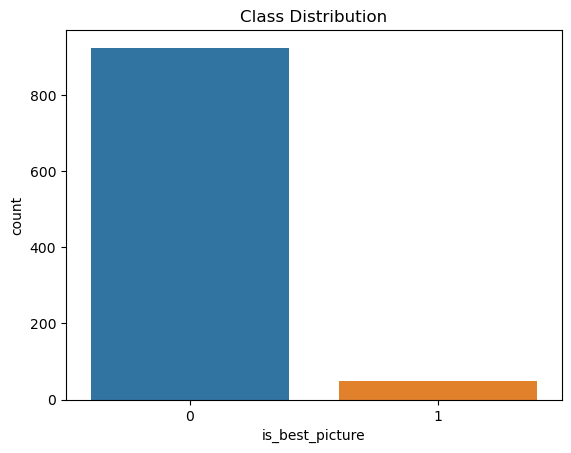

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'target_column' is the column with classes
sns.countplot(x='is_best_picture', data=merged_df_3)
plt.title('Class Distribution')
plt.show()


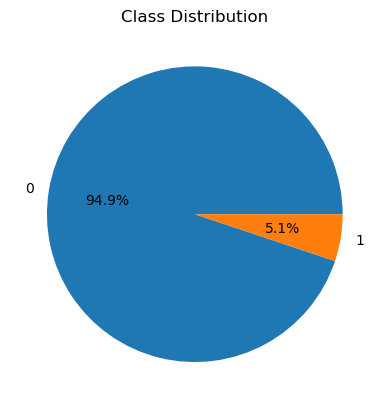

In [80]:
merged_df_3['is_best_picture'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Class Distribution')
plt.ylabel('')  # Hide the y-label
plt.show()


In [81]:
category_columns = [col for col in df_merged.columns if col.endswith('_winner')]

# Summing up the nominations for each film
df_merged['total_wins'] = df_merged[category_columns].sum(axis=1)

# Now, 'df_merged' contains an additional column 'total_nominations' with the sum of nominations across categories for each film
df_merged.head(20)

film  \
0                             $1,000 a Minute   
1                                        '38'   
2                          'Crocodile' Dundee   
3                             'Round Midnight   
4                   (A) Torzija [(A) Torsion]   
5                      ...And Justice for All   
6                                          10   
7                              102 Dalmatians   
8                                          12   
9                                12 Angry Men   
10                                 12 Monkeys   
11                           12 Years a Slave   
12                                  127 Hours   
13                                   12:01 PM   
14  13 Hours: The Secret Soldiers of Benghazi   
15                                       13th   
16                   140 Days under the World   
17                                       1776   
18                                       1848   
19                                       1917   

                                                 name  is_best_picture  \
0                    Republic Studio Sound Department                0   
1                                             Austria                0   
2   Screenplay by Paul Hogan, Ken Shadie, John Cor...                0   
3                                       Dexter Gordon                0   
4                                  Stefan Arsenijevi¿                0   
5                                           Al Pacino                0   
6                                       Henry Mancini                0   
7                                      Anthony Powell                0   
8                                              Russia                0   
9                                        Sidney Lumet                0   
10                                          Brad Pitt                0   
11                                   Chiwetel Ejiofor                1   
12                                       James Franco                0   
13                       Hillary Ripps, Jonathan Heap                0   
14      Gary Summers, Jeffrey J. Haboush and Mac Ruth                0   
15    Ava DuVernay, Spencer Averick and Howard Barish                0   
16         Geoffrey Scott and Oxley Hughan, Producers                0   
17                               Harry Stradling, Jr.                0   
18                  French Cinema General Cooperative                0   
19                                      Roger Deakins                0   

    category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0              0.0                               0.0   
1              0.0                               0.0   
2              0.0                               0.0   
3              0.0                               1.0   
4              0.0                               0.0   
5              0.0                               1.0   
6              0.0                               0.0   
7              0.0                               0.0   
8              0.0                               0.0   
9              0.0                               0.0   
10             0.0                               0.0   
11             0.0                               1.0   
12             0.0                               1.0   
13             0.0                               0.0   
14             0.0                               0.0   
15             0.0                               0.0   
16             0.0                               0.0   
17             0.0                               0.0   
18             0.0                               0.0   
19             0.0                               0.0   

    category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                   0.0               0.0   
1                                   0.0               0.0   
2                                   0.0               0.0   
3                                  

In [82]:
df_merged['total_wins'] -= df_merged['is_best_picture']

In [83]:
df_merged.drop(columns=['BEST PICTURE_winner'], inplace=True)

In [84]:
t = df_merged.loc[(df_merged['is_best_picture'] == 0) & (df_merged['category_BEST PICTURE'] == 1)]
t

film                                               name  \
12             127 Hours                                       James Franco   
19                  1917                                      Roger Deakins   
61    A Clockwork Orange                                    Stanley Kubrick   
73        A Few Good Men                                     Jack Nicholson   
117   A Passage to India                                         Judy Davis   
...                  ...                                                ...   
4967       Women Talking  Dede Gardner, Jeremy Kleiner and Frances McDor...   
4979        Working Girl                                   Melanie Griffith   
5025                   Z                                       Costa-Gavras   
5028    Zero Dark Thirty                                   Jessica Chastain   
5030     Zorba the Greek                                      Anthony Quinn   

      is_best_picture  category_ACTOR  category_ACTOR IN A LEADING ROLE  \
12                  0             0.0                               1.0   
19                  0             0.0                               0.0   
61                  0             0.0                               0.0   
73                  0             0.0                               0.0   
117                 0             0.0                               0.0   
...               ...             ...                               ...   
4967                0             0.0                               0.0   
4979                0             0.0                               0.0   
5025                0             0.0                               0.0   
5028                0             0.0                               0.0   
5030                0             1.0                               0.0   

      category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
12                                    0.0               0.0   
19                                    0.0               0.0   
61                                    0.0               0.0   
73                                    1.0               0.0   
117                                   0.0               0.0   
...                                   ...               ...   
4967                                  0.0               0.0   
4979                                  0.0               0.0   
5025                                  0.0               0.0   
5028                                  0.0               0.0   
5030                                  0.0               0.0   

      category_ACTRESS IN A LEADING ROLE  \
12                                   0.0   
19                                   0.0   
61                                   0.0   
73                                   0.0   
117                                  1.0   
...                                  ...   
4967                                 0.0   
4979                                 1.0   
5025                                 0.0   
5028                                 1.0   
5030                                 0.0   

      category_ACTRESS IN A SUPPORTING ROLE  category_ANIMATED FEATURE FILM  \
12                                      0.0                             0.0   
19                                      0.0                             0.0   
61                                      0.0                             0.0   
73                                      0.0                             0.0   
117                                     1.0                             0.0   
...                                     ...                             ...   
4967                                    0.0                             0.0   
4979                                    1.0                             0.0   
5025                                    0.0                             0.0   
5028                                    0.0                             0.0   
5030           

In [85]:
r = df_merged.loc[(df_merged['is_best_picture'] == 1) & (df_merged['category_BEST PICTURE'] == 1)]
r

film  \
11         12 Years a Slave   
45         A Beautiful Mind   
107   A Man for All Seasons   
264                 Amadeus   
269         American Beauty   
...                     ...   
4350     The Sound of Music   
4368              The Sting   
4607                Titanic   
4626              Tom Jones   
4754             Unforgiven   

                                                   name  is_best_picture  \
11                                     Chiwetel Ejiofor                1   
45                                        Russell Crowe                1   
107                                       Paul Scofield                1   
264                                   F. Murray Abraham                1   
269                                        Kevin Spacey                1   
...                                                 ...              ...   
4350                                      Julie Andrews                1   
4368                                     Robert Redford                1   
4607  Art Direction:  Lyle Wheeler, Maurice Ransford...                1   
4626                                      Albert Finney                1   
4754                                     Clint Eastwood                1   

      category_ACTOR  category_ACTOR IN A LEADING ROLE  \
11               0.0                               1.0   
45               0.0                               1.0   
107              1.0                               0.0   
264              0.0                               1.0   
269              0.0                               1.0   
...              ...                               ...   
4350             0.0                               0.0   
4368             1.0                               0.0   
4607             0.0                               0.0   
4626             1.0                               0.0   
4754             0.0                               1.0   

      category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
11                                    1.0               0.0   
45                                    0.0               0.0   
107                                   1.0               0.0   
264                                   0.0               0.0   
269                                   0.0               0.0   
...                                   ...               ...   
4350                                  0.0               1.0   
4368                                  0.0               0.0   
4607                                  0.0               0.0   
4626                                  1.0               0.0   
4754                                  1.0               0.0   

      category_ACTRESS IN A LEADING ROLE  \
11                                   0.0   
45                                   0.0   
107                                  0.0   
264                                  0.0   
269                                  1.0   
...                                  ...   
4350                                 0.0   
4368                                 0.0   
4607                                 1.0   
4626                                 0.0   
4754                                 0.0   

      category_ACTRESS IN A SUPPORTING ROLE  category_ANIMATED FEATURE FILM  \
11                                      1.0                             0.0   
45                                      1.0                             0.0   
107                                     1.0                             0.0   
264                                     0.0                             0.0   
269                                     0.0                             0.0   
...                                     ...                             ...   
4350                                    1.0                             0.0   
4368                                    0.0                             0.0   
4607                                    1.0

In [86]:
df_combined = pd.concat([t, r], ignore_index=True)

In [87]:
bestfilm_nominee_winner=df_combined.drop(columns=['film','name'])

In [88]:
X = bestfilm_nominee_winner.drop('is_best_picture', axis=1)  # Dropping the target column to get features
y = bestfilm_nominee_winner['is_best_picture']  # Selecting only the target column

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'X' contains your features and 'y' contains your target variable

# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)

# Fit RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_encoded, y)

# Get feature importances
importances_rf = model_rf.feature_importances_


In [90]:
importances_rf

array([1.09634112e-02, 1.55325178e-02, 2.60332713e-02, 5.02184823e-03,
       1.37084658e-02, 1.52891973e-02, 8.98243190e-07, 1.06620887e-02,
       8.73831646e-04, 1.96550580e-03, 3.84685561e-04, 0.00000000e+00,
       1.04431392e-03, 0.00000000e+00, 1.44154769e-02, 1.65458290e-03,
       2.30443247e-03, 1.21200570e-02, 1.86803926e-04, 3.08159138e-03,
       0.00000000e+00, 1.68477397e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.72056684e-02, 1.45728972e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.43764332e-03,
       0.00000000e+00, 0.00000000e+00, 1.43570452e-02, 3.20340034e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.33532433e-03,
       4.15093234e-03, 1.75834059e-04, 1.85604184e-03, 1.50945314e-02,
       8.62085521e-05, 6.66913084e-04, 1.03486552e-04, 0.00000000e+00,
       0.00000000e+00, 7.21673630e-03, 8.90491901e-04, 6.87069476e-04,
      

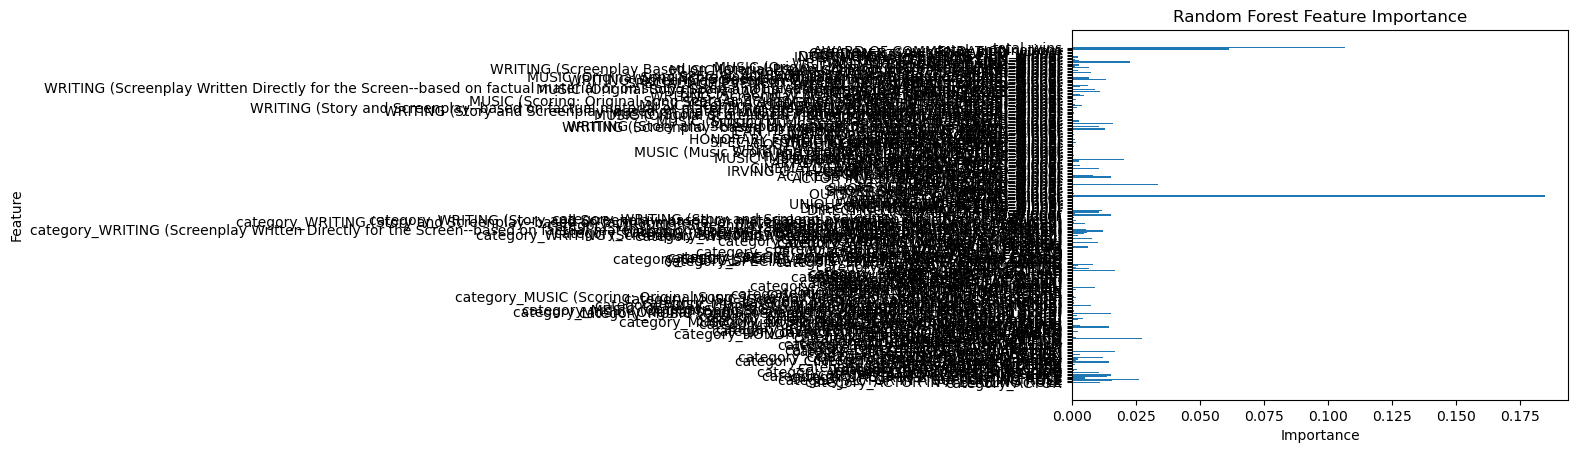

In [91]:
import matplotlib.pyplot as plt

# Visualize feature importances
plt.barh(X.columns, importances_rf)  # Assuming 'X' is a DataFrame
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()


In [92]:
threshold = 0.04  # Example threshold value
selected_features = X.columns[importances_rf > threshold]
selected_features

Index(['DIRECTING_winner', 'total_nominations', 'total_wins'], dtype='object')

In [93]:
# Assuming 'importances_rf' contains feature importances from RandomForestClassifier
k = 10  # Number of top features to select
top_features = importances_rf.argsort()[-k:][::-1]  # Indices of top k features
top_features

array([128, 230, 229, 136,  30,   2, 220, 153,  77,  21], dtype=int64)

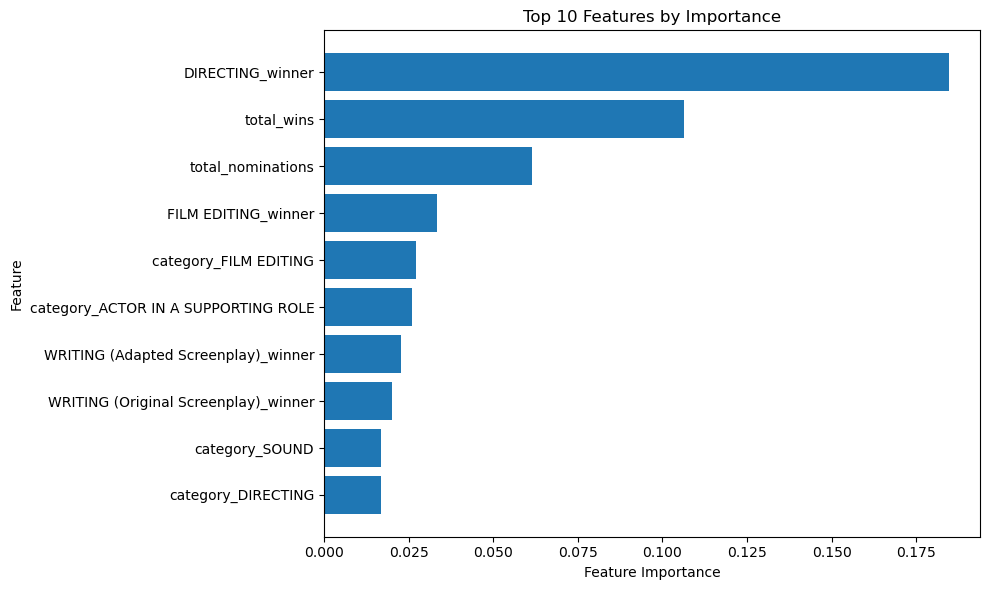

In [94]:
# Get the names of the top k features
top_feature_names = X.columns[top_features]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, importances_rf[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {k} Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()

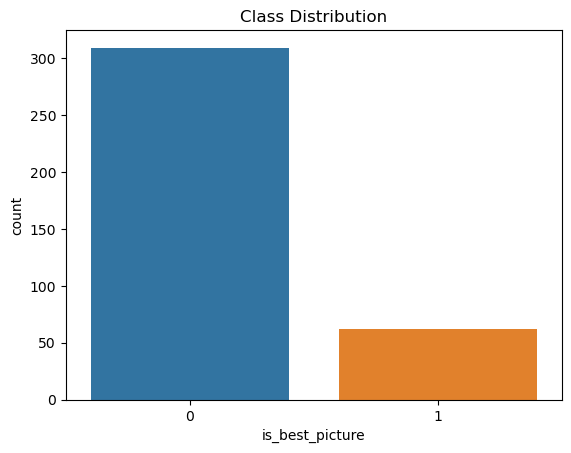

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'target_column' is the column with classes
sns.countplot(x='is_best_picture', data=bestfilm_nominee_winner)
plt.title('Class Distribution')
plt.show()

In [96]:
oscar_boxoffice_merged = pd.merge(boxoffice, df_combined, left_on='movie_title',right_on='film')

oscar_boxoffice_merged

color         director_name  num_critic_for_reviews  duration  \
0    Color         James Cameron                   723.0     178.0   
1    Color         James Cameron                   315.0     194.0   
2    Color           Lee Unkrich                   453.0     103.0   
3    Color           Pete Docter                   408.0      96.0   
4    Color       Martin Scorsese                   682.0     126.0   
..     ...                   ...                     ...       ...   
205  Color  Francis Ford Coppola                   149.0     113.0   
206  Color      John G. Avildsen                   141.0     145.0   
207  Color       Tony Richardson                    30.0     121.0   
208  Color       Martin Scorsese                   211.0     110.0   
209  Color          George Lucas                   100.0     112.0   

     director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                        0.0                   855.0   Joel David Moore   
1                        0.0                   794.0       Kate Winslet   
2                      125.0                   721.0  John Ratzenberger   
3                        0.0                   262.0       Delroy Lindo   
4                    17000.0                  1000.0    Christopher Lee   
..                       ...                     ...                ...   
205                      0.0                   324.0          Teri Garr   
206                     80.0                   794.0   Burgess Meredith   
207                     62.0                    69.0      Susannah York   
208                  17000.0                   595.0      Albert Brooks   
209                      0.0                   425.0         Ron Howard   

     actor_1_facebook_likes        gross  \
0                    1000.0  760505847.0   
1                   29000.0  658672302.0   
2                   15000.0  414984497.0   
3                    1000.0  292979556.0   
4                   17000.0   73820094.0   
..                      ...          ...   
205                 11000.0          NaN   
206                 13000.0  117235247.0   
207                   883.0          NaN   
208                 22000.0          NaN   
209                 11000.0  115000000.0   

                                        genres        actor_1_name  \
0              Action|Adventure|Fantasy|Sci-Fi         CCH Pounder   
1                                Drama|Romance   Leonardo DiCaprio   
2    Adventure|Animation|Comedy|Family|Fantasy           Tom Hanks   
3            Adventure|Animation|Comedy|Family   John Ratzenberger   
4               Adventure|Drama|Family|Mystery  Chloë Grace Moretz   
..                                         ...                 ...   
205                     Drama|Mystery|Thriller       Harrison Ford   
206                                Drama|Sport  Sylvester Stallone   
207                   Adventure|Comedy|History       Albert Finney   
208                                Crime|Drama      Robert De Niro   
209                         Comedy|Drama|Music       Harrison Ford   

           movie_title  num_voted_users  cast_total_facebook_likes  \
0               Avatar           886204                       4834   
1              Titanic           793059                      45223   
2          Toy Story 3           544884                      19085   
3                   Up           665575                       2635   
4                 Hugo           245333                      36017   
..                 ...              ...                        ...   
205   The Conversation            74651                      12157   
206              Rocky           375240                      16094   
207          Tom Jones             8508                       1371   
208        Taxi Driver           507063                      23525   
209  American Graffiti            63839                      14954   

           actor_3_name  facenumber_in_poster  \
0  

In [97]:
oscar_boxoffice_merged.describe()

num_critic_for_reviews    duration  director_facebook_likes  \
count              210.000000  210.000000               210.000000   
mean               267.171429  136.166667              2418.333333   
std                182.535411   33.144397              5470.026829   
min                 27.000000   85.000000                 0.000000   
25%                119.000000  115.000000                 0.000000   
50%                221.000000  128.500000               160.000000   
75%                390.250000  151.000000               655.000000   
max                765.000000  289.000000             22000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count              210.000000              210.000000  1.910000e+02   
mean               980.900000             9638.419048  1.032564e+08   
std               2648.814124            10436.164085  1.003577e+08   
min                  4.000000               39.000000  4.525000e+04   
25%                188.000000              821.500000  4.018845e+07   
50%                416.500000             8000.000000  7.560000e+07   
75%                694.500000            15000.000000  1.364104e+08   
max              23000.000000            49000.000000  7.605058e+08   

       num_voted_users  cast_total_facebook_likes  facenumber_in_poster  \
count     2.100000e+02                 210.000000            210.000000   
mean      2.943370e+05               14403.561905              0.828571   
std       3.032576e+05               16420.980568              1.267610   
min       2.789000e+03                  87.000000              0.000000   
25%       7.911850e+04                2045.500000              0.000000   
50%       1.899765e+05                9790.500000              0.000000   
75%       3.981252e+05               20061.000000              1.000000   
max       1.689764e+06               83012.000000              8.000000   

       num_user_for_reviews        budget   title_year  \
count            210.000000  2.060000e+02   210.000000   
mean             714.880952  3.437520e+07  1996.714286   
std              718.255216  4.097304e+07    15.099488   
min               20.000000  7.770000e+05  1961.000000   
25%              258.250000  8.375000e+06  1986.250000   
50%              492.500000  2.000000e+07  2000.500000   
75%              881.000000  4.000000e+07  2010.000000   
max             5060.000000  2.370000e+08  2015.000000   

       actor_2_facebook_likes  imdb_score  aspect_ratio  movie_facebook_likes  \
count              210.000000  210.000000    210.000000            210.000000   
mean              2972.061905    7.780476      2.060238          27896.295238   
std               5492.847908    0.514712      0.283496          42711.923365   
min                 10.000000    5.300000      1.330000              0.000000   
25%                389.250000    7.500000      1.850000              0.000000   
50%                745.000000    7.800000      1.850000          12000.000000   
75%               1000.000000    8.100000      2.350000          32500.000000   
max              27000.000000    9.300000      2.400000         199000.000000   

       is_best_picture  category_ACTOR  category_ACTOR IN A LEADING ROLE  \
count       210.000000      210.000000                        210.000000   
mean          0.238095        0.080952                          0.371429   
std           0.426935        0.273414                          0.484341   
min           0.000000        0.000000                          0.000000   
25%           0.000000        0.000000                          0.000000   
50%           0.000000        0.000000                          0.000000   
75%           0.000000        0.000000                          1.000000   
max           1.000000        1.000000                          1.000000   

       category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
count                           210.000000        210.0000

In [98]:
missing_values_count_per_column = oscar_boxoffice_merged.isna().sum(axis=0)
print(list(missing_values_count_per_column))


[0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [99]:
# Drop rows where 'gross' column has missing values
oscar_boxoffice=oscar_boxoffice_merged.dropna(subset=['gross'])
oscar_boxoffice

color     director_name  num_critic_for_reviews  duration  \
0    Color     James Cameron                   723.0     178.0   
1    Color     James Cameron                   315.0     194.0   
2    Color       Lee Unkrich                   453.0     103.0   
3    Color       Pete Docter                   408.0      96.0   
4    Color   Martin Scorsese                   682.0     126.0   
..     ...               ...                     ...       ...   
201  Color      Debra Granik                   365.0     100.0   
203  Color      Benh Zeitlin                   663.0      93.0   
204  Color        Todd Field                   179.0     138.0   
206  Color  John G. Avildsen                   141.0     145.0   
209  Color      George Lucas                   100.0     112.0   

     director_facebook_likes  actor_3_facebook_likes       actor_2_name  \
0                        0.0                   855.0   Joel David Moore   
1                        0.0                   794.0       Kate Winslet   
2                      125.0                   721.0  John Ratzenberger   
3                        0.0                   262.0       Delroy Lindo   
4                    17000.0                  1000.0    Christopher Lee   
..                       ...                     ...                ...   
201                     81.0                   179.0   Shelley Waggener   
203                    188.0                   168.0       Gina Montana   
204                    143.0                   783.0       Sissy Spacek   
206                     80.0                   794.0   Burgess Meredith   
209                      0.0                   425.0         Ron Howard   

     actor_1_facebook_likes        gross  \
0                    1000.0  760505847.0   
1                   29000.0  658672302.0   
2                   15000.0  414984497.0   
3                    1000.0  292979556.0   
4                   17000.0   73820094.0   
..                      ...          ...   
201                 34000.0    6531491.0   
203                  2000.0   12784397.0   
204                  1000.0   35918429.0   
206                 13000.0  117235247.0   
209                 11000.0  115000000.0   

                                        genres        actor_1_name  \
0              Action|Adventure|Fantasy|Sci-Fi         CCH Pounder   
1                                Drama|Romance   Leonardo DiCaprio   
2    Adventure|Animation|Comedy|Family|Fantasy           Tom Hanks   
3            Adventure|Animation|Comedy|Family   John Ratzenberger   
4               Adventure|Drama|Family|Mystery  Chloë Grace Moretz   
..                                         ...                 ...   
201                                      Drama   Jennifer Lawrence   
203                              Drama|Fantasy   Quvenzhané Wallis   
204                                Crime|Drama       Tom Wilkinson   
206                                Drama|Sport  Sylvester Stallone   
209                         Comedy|Drama|Music       Harrison Ford   

                     movie_title  num_voted_users  cast_total_facebook_likes  \
0                         Avatar           886204                       4834   
1                        Titanic           793059                      45223   
2                    Toy Story 3           544884                      19085   
3                             Up           665575                       2635   
4                           Hugo           245333                      36017   
..                           ...              ...                        ...   
201                Winter's Bone           111658                      34446   
203  Beasts of the Southern Wild            70336                       2658   
204               In the Bedroom            32415                       3970   
206                        Rocky           375240                      16094   
209            American Graffiti            63839            

In [100]:
oscar_boxoffice['is_best_picture']

0      0
1      1
2      0
3      0
4      0
      ..
201    0
203    0
204    0
206    1
209    0
Name: is_best_picture, Length: 191, dtype: int64

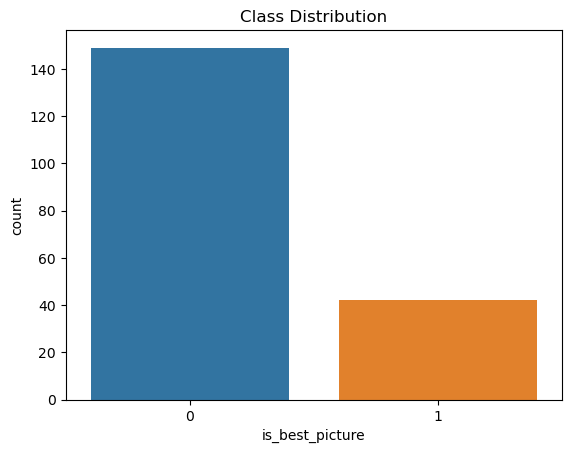

In [101]:
# Assuming 'target_column' is the column with classes
sns.countplot(x='is_best_picture', data=oscar_boxoffice)
plt.title('Class Distribution')
plt.show()

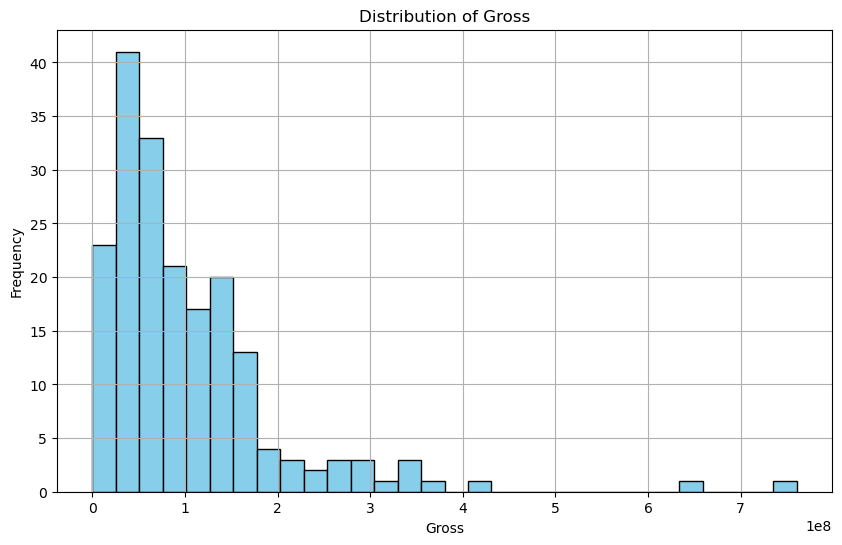

In [102]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(oscar_boxoffice['gross'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Gross')
plt.xlabel('Gross')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


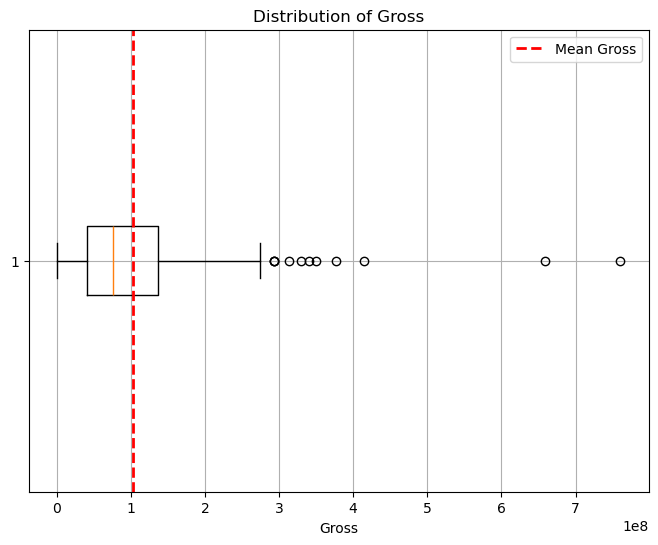

In [103]:
import matplotlib.pyplot as plt

# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(oscar_boxoffice['gross'], vert=False)
plt.title('Distribution of Gross')
plt.xlabel('Gross')
plt.grid(True)

# Add vertical line for mean
mean_gross = oscar_boxoffice['gross'].mean()
plt.axvline(mean_gross, color='red', linestyle='dashed', linewidth=2, label='Mean Gross')

plt.legend()
plt.show()


C:\Users\chubb\AppData\Local\Temp\ipykernel_24092\2483960786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_boxoffice['gross_log'] = np.log(oscar_boxoffice['gross'])


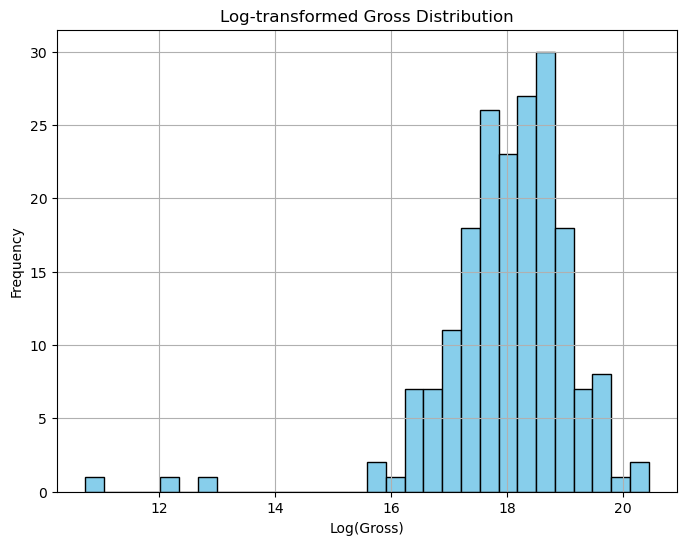

In [104]:
import numpy as np

# Apply logarithmic transformation to 'gross'
oscar_boxoffice['gross_log'] = np.log(oscar_boxoffice['gross'])

# Visualize the transformed distribution
plt.figure(figsize=(8, 6))
plt.hist(oscar_boxoffice['gross_log'], bins=30, color='skyblue', edgecolor='black')
plt.title('Log-transformed Gross Distribution')
plt.xlabel('Log(Gross)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


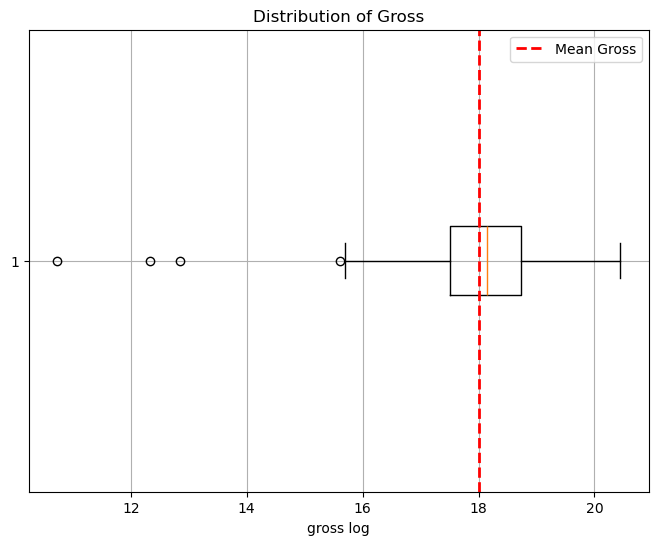

In [105]:
# Plot box plot
plt.figure(figsize=(8, 6))
plt.boxplot(oscar_boxoffice['gross_log'], vert=False)
plt.title('Distribution of Gross')
plt.xlabel('gross log')
plt.grid(True)

# Add vertical line for mean
mean_gross = oscar_boxoffice['gross_log'].mean()
plt.axvline(mean_gross, color='red', linestyle='dashed', linewidth=2, label='Mean Gross')

plt.legend()
plt.show()

In [106]:
'''
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Example DataFrame
data = {'movie_title': ['Avatar', 'Pirates of the Caribbean', 'James Bond', 'The Dark Knight'],
        'plot_keywords': ['avatar|future|marine|native|paraplegic',
                          'goddess|marriage ceremony|marriage proposal|pirate|singapore',
                          'bomb|espionage|sequel|spy|terrorist',
                          'deception|imprisonment|lawlessness|police officer|terrorist plot',
                          'alien|american civil war|male nipple|mars|princess',
                          'sandman|spider man|symbiote|venom|villain',
                          '17th century|based on fairy tale|disney|flower|tower',
                          'artificial intelligence|based on comic book|captain america|marvel cinematic universe|superhero']}

# Create DataFrame
df = pd.DataFrame(data)

# Split the strings in 'plot_keywords' into lists
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: x.split('|'))

# Find the maximum number of elements in any list
max_length = df['plot_keywords'].apply(len).max()

# Pad the shorter lists with 'None' to make them all the same length
df['plot_keywords'] = df['plot_keywords'].apply(lambda x: x + ['None'] * (max_length - len(x)))

# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

# Apply MultiLabelBinarizer to plot_keywords column
keywords_encoded = pd.DataFrame(mlb.fit_transform(df['plot_keywords']), columns=mlb.classes_, index=df.index)

# Concatenate the original DataFrame with the encoded keywords DataFrame
df = pd.concat([df.drop('plot_keywords', axis=1), keywords_encoded], axis=1)

print(df)
'''

"\nimport pandas as pd\nfrom sklearn.preprocessing import MultiLabelBinarizer\n\n# Example DataFrame\ndata = {'movie_title': ['Avatar', 'Pirates of the Caribbean', 'James Bond', 'The Dark Knight'],\n        'plot_keywords': ['avatar|future|marine|native|paraplegic',\n                          'goddess|marriage ceremony|marriage proposal|pirate|singapore',\n                          'bomb|espionage|sequel|spy|terrorist',\n                          'deception|imprisonment|lawlessness|police officer|terrorist plot',\n                          'alien|american civil war|male nipple|mars|princess',\n                          'sandman|spider man|symbiote|venom|villain',\n                          '17th century|based on fairy tale|disney|flower|tower',\n                          'artificial intelligence|based on comic book|captain america|marvel cinematic universe|superhero']}\n\n# Create DataFrame\ndf = pd.DataFrame(data)\n\n# Split the strings in 'plot_keywords' into lists\ndf['plot_keywords

In [107]:
oscar_boxoffice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 209
Columns: 263 entries, color to gross_log
dtypes: float64(130), int32(114), int64(5), object(14)
memory usage: 308.9+ KB


In [108]:
oscar_boxoffice.drop(columns=['color','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','movie_title','cast_total_facebook_likes','facenumber_in_poster','movie_imdb_link','language','country','content_rating','title_year','actor_2_facebook_likes'],inplace=True)
oscar_boxoffice

C:\Users\chubb\AppData\Local\Temp\ipykernel_24092\3905870696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oscar_boxoffice.drop(columns=['color','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','movie_title','cast_total_facebook_likes','facenumber_in_poster','movie_imdb_link','language','country','content_rating','title_year','actor_2_facebook_likes'],inplace=True)


director_name  num_critic_for_reviews  duration       actor_2_name  \
0       James Cameron                   723.0     178.0   Joel David Moore   
1       James Cameron                   315.0     194.0       Kate Winslet   
2         Lee Unkrich                   453.0     103.0  John Ratzenberger   
3         Pete Docter                   408.0      96.0       Delroy Lindo   
4     Martin Scorsese                   682.0     126.0    Christopher Lee   
..                ...                     ...       ...                ...   
201      Debra Granik                   365.0     100.0   Shelley Waggener   
203      Benh Zeitlin                   663.0      93.0       Gina Montana   
204        Todd Field                   179.0     138.0       Sissy Spacek   
206  John G. Avildsen                   141.0     145.0   Burgess Meredith   
209      George Lucas                   100.0     112.0         Ron Howard   

           gross                                     genres  \
0    760505847.0            Action|Adventure|Fantasy|Sci-Fi   
1    658672302.0                              Drama|Romance   
2    414984497.0  Adventure|Animation|Comedy|Family|Fantasy   
3    292979556.0          Adventure|Animation|Comedy|Family   
4     73820094.0             Adventure|Drama|Family|Mystery   
..           ...                                        ...   
201    6531491.0                                      Drama   
203   12784397.0                              Drama|Fantasy   
204   35918429.0                                Crime|Drama   
206  117235247.0                                Drama|Sport   
209  115000000.0                         Comedy|Drama|Music   

           actor_1_name  num_voted_users        actor_3_name  \
0           CCH Pounder           886204           Wes Studi   
1     Leonardo DiCaprio           793059       Gloria Stuart   
2             Tom Hanks           544884         Don Rickles   
3     John Ratzenberger           665575        Jess Harnell   
4    Chloë Grace Moretz           245333        Ray Winstone   
..                  ...              ...                 ...   
201   Jennifer Lawrence           111658     Lauren Sweetser   
203   Quvenzhané Wallis            70336        Dwight Henry   
204       Tom Wilkinson            32415         Karen Allen   
206  Sylvester Stallone           375240       Carl Weathers   
209       Harrison Ford            63839  Mackenzie Phillips   

                                         plot_keywords  num_user_for_reviews  \
0               avatar|future|marine|native|paraplegic                3054.0   
1                         artist|love|ship|titanic|wet                2528.0   
2               college|day care|escape|teddy bear|toy                 733.0   
3            balloon|house|promise|retirement|skeleton                 704.0   
4    automaton|mechanical|railway station|steampunk...                 678.0   
..                                                 ...                   ...   
201  bail|crystal meth|family relationships|female ...                 297.0   
203     auroch|community|hospital|illness|six year old                 269.0   
204          doctor|maine|only son|school choir|summer                 510.0   
206  boxer|hometown hero|philadelphia pennsylvania|...                 542.0   
209  california|car|drag racing|high school|rock 'n...                 238.0   

          budget  imdb_score  aspect_ratio  movie_facebook_likes  \
0    237000000.0         7.9          1.78                 33000   
1    200000000.0         7.7          2.35                 26000   
2    200000000.0         8.3          1.85                 30000   
3    175000000.0         8.3          1.85                 27000   
4    170000000.0         7.5          1.85                 42000   
..           ...         ...           ...                   ...   
201    2000000.0         7.2          1.85                 20000   
203    1800000.0         7.3          1.

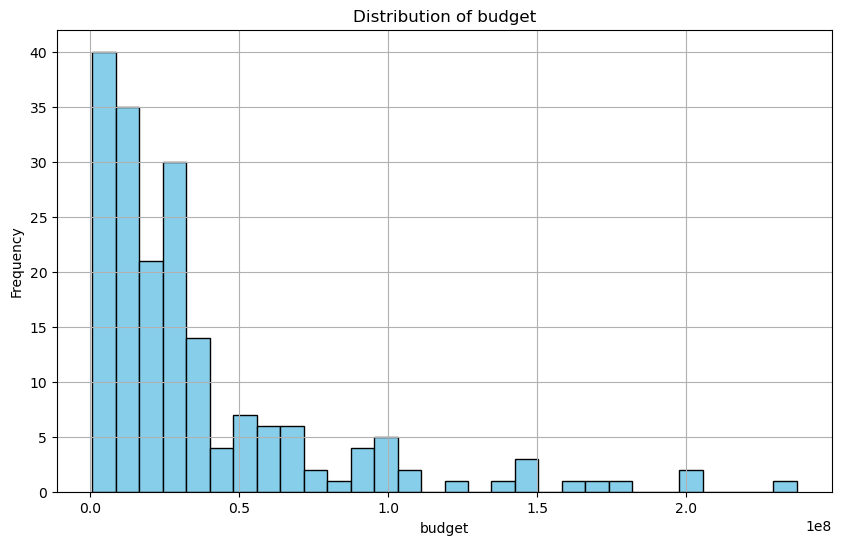

In [109]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(oscar_boxoffice['budget'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of budget')
plt.xlabel('budget')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [111]:
oscar_boxoffice['budget'].value_counts()

budget
25000000.0    16
15000000.0    10
40000000.0    10
14000000.0     6
6000000.0      6
              ..
29000000.0     1
38000000.0     1
31500000.0     1
31000000.0     1
777000.0       1
Name: count, Length: 88, dtype: int64

In [112]:
# One-hot encode the 'genres' column
genres_encoded = oscar_boxoffice['genres'].str.get_dummies(sep='|')

# Concatenate the original DataFrame with the encoded genres DataFrame
oscar_boxoffice_encoded = pd.concat([oscar_boxoffice.drop('genres', axis=1), genres_encoded], axis=1)

oscar_boxoffice_encoded

director_name  num_critic_for_reviews  duration       actor_2_name  \
0       James Cameron                   723.0     178.0   Joel David Moore   
1       James Cameron                   315.0     194.0       Kate Winslet   
2         Lee Unkrich                   453.0     103.0  John Ratzenberger   
3         Pete Docter                   408.0      96.0       Delroy Lindo   
4     Martin Scorsese                   682.0     126.0    Christopher Lee   
..                ...                     ...       ...                ...   
201      Debra Granik                   365.0     100.0   Shelley Waggener   
203      Benh Zeitlin                   663.0      93.0       Gina Montana   
204        Todd Field                   179.0     138.0       Sissy Spacek   
206  John G. Avildsen                   141.0     145.0   Burgess Meredith   
209      George Lucas                   100.0     112.0         Ron Howard   

           gross        actor_1_name  num_voted_users        actor_3_name  \
0    760505847.0         CCH Pounder           886204           Wes Studi   
1    658672302.0   Leonardo DiCaprio           793059       Gloria Stuart   
2    414984497.0           Tom Hanks           544884         Don Rickles   
3    292979556.0   John Ratzenberger           665575        Jess Harnell   
4     73820094.0  Chloë Grace Moretz           245333        Ray Winstone   
..           ...                 ...              ...                 ...   
201    6531491.0   Jennifer Lawrence           111658     Lauren Sweetser   
203   12784397.0   Quvenzhané Wallis            70336        Dwight Henry   
204   35918429.0       Tom Wilkinson            32415         Karen Allen   
206  117235247.0  Sylvester Stallone           375240       Carl Weathers   
209  115000000.0       Harrison Ford            63839  Mackenzie Phillips   

                                         plot_keywords  num_user_for_reviews  \
0               avatar|future|marine|native|paraplegic                3054.0   
1                         artist|love|ship|titanic|wet                2528.0   
2               college|day care|escape|teddy bear|toy                 733.0   
3            balloon|house|promise|retirement|skeleton                 704.0   
4    automaton|mechanical|railway station|steampunk...                 678.0   
..                                                 ...                   ...   
201  bail|crystal meth|family relationships|female ...                 297.0   
203     auroch|community|hospital|illness|six year old                 269.0   
204          doctor|maine|only son|school choir|summer                 510.0   
206  boxer|hometown hero|philadelphia pennsylvania|...                 542.0   
209  california|car|drag racing|high school|rock 'n...                 238.0   

          budget  imdb_score  aspect_ratio  movie_facebook_likes  \
0    237000000.0         7.9          1.78                 33000   
1    200000000.0         7.7          2.35                 26000   
2    200000000.0         8.3          1.85                 30000   
3    175000000.0         8.3          1.85                 27000   
4    170000000.0         7.5          1.85                 42000   
..           ...         ...           ...                   ...   
201    2000000.0         7.2          1.85                 20000   
203    1800000.0         7.3          1.85                 31000   
204    1700000.0         7.5          2.35                   951   
206     960000.0         8.1          1.33                     0   
209     777000.0         7.5          2.35                     0   

                            film  \
0                         Avatar   
1                        Titanic   
2                    Toy Story 3   
3                             Up   
4                           Hugo   
..                           ...   
201                Winter's Bone   
203  Beasts of the Southern Wild   
204               In the Bedroom   
206     

In [113]:
oscar_boxoffice_encoded.head()

director_name  num_critic_for_reviews  duration       actor_2_name  \
0    James Cameron                   723.0     178.0   Joel David Moore   
1    James Cameron                   315.0     194.0       Kate Winslet   
2      Lee Unkrich                   453.0     103.0  John Ratzenberger   
3      Pete Docter                   408.0      96.0       Delroy Lindo   
4  Martin Scorsese                   682.0     126.0    Christopher Lee   

         gross        actor_1_name  num_voted_users   actor_3_name  \
0  760505847.0         CCH Pounder           886204      Wes Studi   
1  658672302.0   Leonardo DiCaprio           793059  Gloria Stuart   
2  414984497.0           Tom Hanks           544884    Don Rickles   
3  292979556.0   John Ratzenberger           665575   Jess Harnell   
4   73820094.0  Chloë Grace Moretz           245333   Ray Winstone   

                                       plot_keywords  num_user_for_reviews  \
0             avatar|future|marine|native|paraplegic                3054.0   
1                       artist|love|ship|titanic|wet                2528.0   
2             college|day care|escape|teddy bear|toy                 733.0   
3          balloon|house|promise|retirement|skeleton                 704.0   
4  automaton|mechanical|railway station|steampunk...                 678.0   

        budget  imdb_score  aspect_ratio  movie_facebook_likes         film  \
0  237000000.0         7.9          1.78                 33000       Avatar   
1  200000000.0         7.7          2.35                 26000      Titanic   
2  200000000.0         8.3          1.85                 30000  Toy Story 3   
3  175000000.0         8.3          1.85                 27000           Up   
4  170000000.0         7.5          1.85                 42000         Hugo   

                                                name  is_best_picture  \
0  Production Design: Rick Carter and Robert Stro...                0   
1  Art Direction:  Lyle Wheeler, Maurice Ransford...                1   
2                                        Lee Unkrich                0   
3                              Mike Hoover, Producer                0   
4  Production Design: Dante Ferretti; Set Decorat...                0   

   category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0             0.0                               0.0   
1             0.0                               0.0   
2             0.0                               0.0   
3             0.0                               0.0   
4             0.0                               0.0   

   category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                  0.0               0.0   
1                                  0.0               0.0   
2                                  0.0               0.0   
3                                  0.0               0.0   
4                                  0.0               0.0   

   category_ACTRESS IN A LEADING ROLE  category_ACTRESS IN A SUPPORTING ROLE  \
0                                 0.0                                    0.0   
1                                 1.0                                    1.0   
2                                 0.0                                    0.0   
3                                 0.0                                    0.0   
4                                 0.0                                    0.0   

   category_ANIMATED FEATURE FILM  category_ART DIRECTION  \
0                             0.0                     1.0   
1                             0.0                     1.0   
2                             1.0                     0.0   
3                             1.0                     0.0   
4                             0.0                     1.0   

   category_ART DIRECTION (Black-and-White)  category_ART DIRECTION (Color)  \
0                                       0.0                             0.0   
1                                       1.0         

In [114]:
oscar_boxoffice['movie_facebook_likes'].value_counts()

movie_facebook_likes
0        65
10000     6
16000     6
22000     5
21000     5
         ..
99000     1
845       1
41000     1
75000     1
951       1
Name: count, Length: 76, dtype: int64

In [115]:
oscar_boxoffice_encoded.drop(columns=['movie_facebook_likes'],inplace=True)
oscar_boxoffice_encoded

director_name  num_critic_for_reviews  duration       actor_2_name  \
0       James Cameron                   723.0     178.0   Joel David Moore   
1       James Cameron                   315.0     194.0       Kate Winslet   
2         Lee Unkrich                   453.0     103.0  John Ratzenberger   
3         Pete Docter                   408.0      96.0       Delroy Lindo   
4     Martin Scorsese                   682.0     126.0    Christopher Lee   
..                ...                     ...       ...                ...   
201      Debra Granik                   365.0     100.0   Shelley Waggener   
203      Benh Zeitlin                   663.0      93.0       Gina Montana   
204        Todd Field                   179.0     138.0       Sissy Spacek   
206  John G. Avildsen                   141.0     145.0   Burgess Meredith   
209      George Lucas                   100.0     112.0         Ron Howard   

           gross        actor_1_name  num_voted_users        actor_3_name  \
0    760505847.0         CCH Pounder           886204           Wes Studi   
1    658672302.0   Leonardo DiCaprio           793059       Gloria Stuart   
2    414984497.0           Tom Hanks           544884         Don Rickles   
3    292979556.0   John Ratzenberger           665575        Jess Harnell   
4     73820094.0  Chloë Grace Moretz           245333        Ray Winstone   
..           ...                 ...              ...                 ...   
201    6531491.0   Jennifer Lawrence           111658     Lauren Sweetser   
203   12784397.0   Quvenzhané Wallis            70336        Dwight Henry   
204   35918429.0       Tom Wilkinson            32415         Karen Allen   
206  117235247.0  Sylvester Stallone           375240       Carl Weathers   
209  115000000.0       Harrison Ford            63839  Mackenzie Phillips   

                                         plot_keywords  num_user_for_reviews  \
0               avatar|future|marine|native|paraplegic                3054.0   
1                         artist|love|ship|titanic|wet                2528.0   
2               college|day care|escape|teddy bear|toy                 733.0   
3            balloon|house|promise|retirement|skeleton                 704.0   
4    automaton|mechanical|railway station|steampunk...                 678.0   
..                                                 ...                   ...   
201  bail|crystal meth|family relationships|female ...                 297.0   
203     auroch|community|hospital|illness|six year old                 269.0   
204          doctor|maine|only son|school choir|summer                 510.0   
206  boxer|hometown hero|philadelphia pennsylvania|...                 542.0   
209  california|car|drag racing|high school|rock 'n...                 238.0   

          budget  imdb_score  aspect_ratio                         film  \
0    237000000.0         7.9          1.78                       Avatar   
1    200000000.0         7.7          2.35                      Titanic   
2    200000000.0         8.3          1.85                  Toy Story 3   
3    175000000.0         8.3          1.85                           Up   
4    170000000.0         7.5          1.85                         Hugo   
..           ...         ...           ...                          ...   
201    2000000.0         7.2          1.85                Winter's Bone   
203    1800000.0         7.3          1.85  Beasts of the Southern Wild   
204    1700000.0         7.5          2.35               In the Bedroom   
206     960000.0         8.1          1.33                        Rocky   
209     777000.0         7.5          2.35            American Graffiti   

                                                  name  is_best_picture  \
0    Production Design: Rick Carter and Robert Stro...                0   
1    Art Direction:  Lyle Wheeler, Maurice Ransford...                1   
2                                          Lee Unkrich     

In [116]:
# One-hot encode the 'genres' column
plot_keywords_encoded = oscar_boxoffice_encoded['plot_keywords'].str.get_dummies(sep='|')

# Concatenate the original DataFrame with the encoded genres DataFrame
features_df = pd.concat([oscar_boxoffice_encoded.drop('plot_keywords', axis=1), plot_keywords_encoded], axis=1)

features_df

director_name  num_critic_for_reviews  duration       actor_2_name  \
0       James Cameron                   723.0     178.0   Joel David Moore   
1       James Cameron                   315.0     194.0       Kate Winslet   
2         Lee Unkrich                   453.0     103.0  John Ratzenberger   
3         Pete Docter                   408.0      96.0       Delroy Lindo   
4     Martin Scorsese                   682.0     126.0    Christopher Lee   
..                ...                     ...       ...                ...   
201      Debra Granik                   365.0     100.0   Shelley Waggener   
203      Benh Zeitlin                   663.0      93.0       Gina Montana   
204        Todd Field                   179.0     138.0       Sissy Spacek   
206  John G. Avildsen                   141.0     145.0   Burgess Meredith   
209      George Lucas                   100.0     112.0         Ron Howard   

           gross        actor_1_name  num_voted_users        actor_3_name  \
0    760505847.0         CCH Pounder           886204           Wes Studi   
1    658672302.0   Leonardo DiCaprio           793059       Gloria Stuart   
2    414984497.0           Tom Hanks           544884         Don Rickles   
3    292979556.0   John Ratzenberger           665575        Jess Harnell   
4     73820094.0  Chloë Grace Moretz           245333        Ray Winstone   
..           ...                 ...              ...                 ...   
201    6531491.0   Jennifer Lawrence           111658     Lauren Sweetser   
203   12784397.0   Quvenzhané Wallis            70336        Dwight Henry   
204   35918429.0       Tom Wilkinson            32415         Karen Allen   
206  117235247.0  Sylvester Stallone           375240       Carl Weathers   
209  115000000.0       Harrison Ford            63839  Mackenzie Phillips   

     num_user_for_reviews       budget  imdb_score  aspect_ratio  \
0                  3054.0  237000000.0         7.9          1.78   
1                  2528.0  200000000.0         7.7          2.35   
2                   733.0  200000000.0         8.3          1.85   
3                   704.0  175000000.0         8.3          1.85   
4                   678.0  170000000.0         7.5          1.85   
..                    ...          ...         ...           ...   
201                 297.0    2000000.0         7.2          1.85   
203                 269.0    1800000.0         7.3          1.85   
204                 510.0    1700000.0         7.5          2.35   
206                 542.0     960000.0         8.1          1.33   
209                 238.0     777000.0         7.5          2.35   

                            film  \
0                         Avatar   
1                        Titanic   
2                    Toy Story 3   
3                             Up   
4                           Hugo   
..                           ...   
201                Winter's Bone   
203  Beasts of the Southern Wild   
204               In the Bedroom   
206                        Rocky   
209            American Graffiti   

                                                  name  is_best_picture  \
0    Production Design: Rick Carter and Robert Stro...                0   
1    Art Direction:  Lyle Wheeler, Maurice Ransford...                1   
2                                          Lee Unkrich                0   
3                                Mike Hoover, Producer                0   
4    Production Design: Dante Ferretti; Set Decorat...                0   
..                                                 ...              ...   
201                                        John Hawkes                0   
203                                  Quvenzhané Wallis                0   
204                                      Tom Wilkinson                0   
206                                 Sylvester Stallone                1   
209                                        Candy Clark                0

In [117]:
#features_df.drop(columns=['budget'],inplace=True)
features_df.drop(columns=['budget','film','name','gross'],inplace=True)
features_df

director_name  num_critic_for_reviews  duration       actor_2_name  \
0       James Cameron                   723.0     178.0   Joel David Moore   
1       James Cameron                   315.0     194.0       Kate Winslet   
2         Lee Unkrich                   453.0     103.0  John Ratzenberger   
3         Pete Docter                   408.0      96.0       Delroy Lindo   
4     Martin Scorsese                   682.0     126.0    Christopher Lee   
..                ...                     ...       ...                ...   
201      Debra Granik                   365.0     100.0   Shelley Waggener   
203      Benh Zeitlin                   663.0      93.0       Gina Montana   
204        Todd Field                   179.0     138.0       Sissy Spacek   
206  John G. Avildsen                   141.0     145.0   Burgess Meredith   
209      George Lucas                   100.0     112.0         Ron Howard   

           actor_1_name  num_voted_users        actor_3_name  \
0           CCH Pounder           886204           Wes Studi   
1     Leonardo DiCaprio           793059       Gloria Stuart   
2             Tom Hanks           544884         Don Rickles   
3     John Ratzenberger           665575        Jess Harnell   
4    Chloë Grace Moretz           245333        Ray Winstone   
..                  ...              ...                 ...   
201   Jennifer Lawrence           111658     Lauren Sweetser   
203   Quvenzhané Wallis            70336        Dwight Henry   
204       Tom Wilkinson            32415         Karen Allen   
206  Sylvester Stallone           375240       Carl Weathers   
209       Harrison Ford            63839  Mackenzie Phillips   

     num_user_for_reviews  imdb_score  aspect_ratio  is_best_picture  \
0                  3054.0         7.9          1.78                0   
1                  2528.0         7.7          2.35                1   
2                   733.0         8.3          1.85                0   
3                   704.0         8.3          1.85                0   
4                   678.0         7.5          1.85                0   
..                    ...         ...           ...              ...   
201                 297.0         7.2          1.85                0   
203                 269.0         7.3          1.85                0   
204                 510.0         7.5          2.35                0   
206                 542.0         8.1          1.33                1   
209                 238.0         7.5          2.35                0   

     category_ACTOR  category_ACTOR IN A LEADING ROLE  \
0               0.0                               0.0   
1               0.0                               0.0   
2               0.0                               0.0   
3               0.0                               0.0   
4               0.0                               0.0   
..              ...                               ...   
201             0.0                               0.0   
203             0.0                               0.0   
204             0.0                               1.0   
206             0.0                               1.0   
209             0.0                               0.0   

     category_ACTOR IN A SUPPORTING ROLE  category_ACTRESS  \
0                                    0.0               0.0   
1                                    0.0               0.0   
2                                    0.0               0.0   
3                                    0.0               0.0   
4                                    0.0               0.0   
..                                   ...               ...   
201                                  1.0               0.0   
203                                  0.0               0.0   
204                                  0.0               0.0   
206                                  1.0               0.0   
209                                  0.0               0.0   

     ca

In [118]:
X = features_df.drop('is_best_picture', axis=1)  # Dropping the target column to get features
y = features_df['is_best_picture']  # Selecting only the target column

In [119]:
# Find columns with null values
columns_with_null = features_df.columns[features_df.isna().any()].tolist()

print("Columns with null values:")
print(columns_with_null)


Columns with null values:
[]


In [120]:
# Encode categorical variables
label_encoder = LabelEncoder()
X_encoded = X.apply(lambda x: label_encoder.fit_transform(x) if x.dtype == 'object' else x)

# Fit RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_encoded, y)

# Get feature importances
importances_rf = model_rf.feature_importances_
importances_rf

array([0.01312599, 0.01981022, 0.01694544, ..., 0.        , 0.        ,
       0.0035412 ])

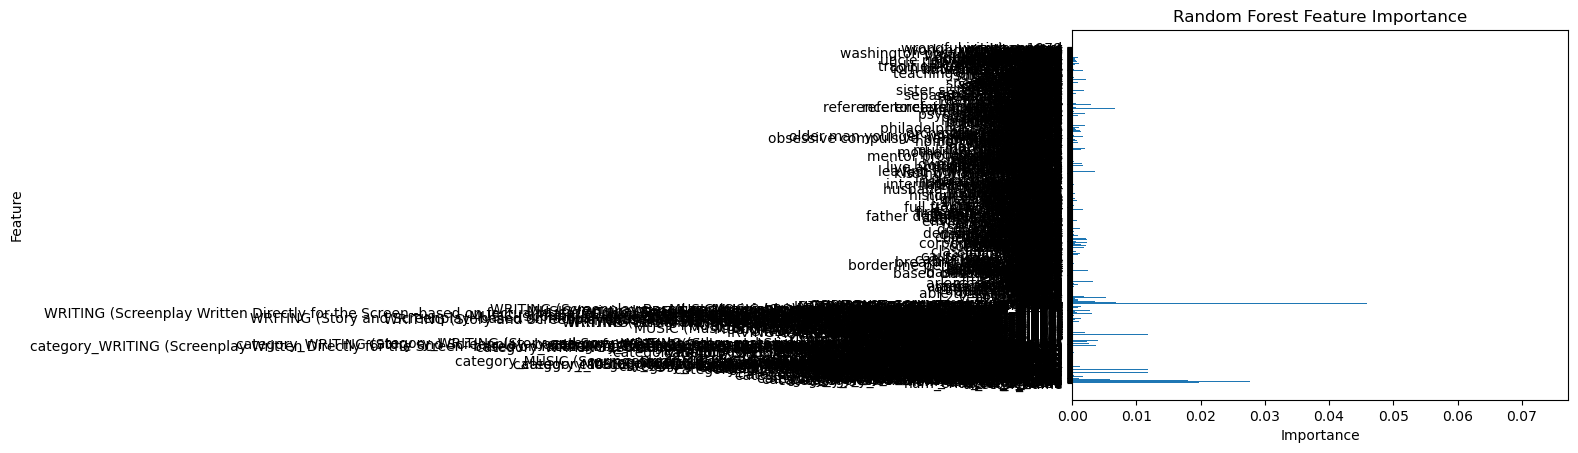

In [121]:
# Visualize feature importances
plt.barh(X.columns, importances_rf)  # Assuming 'X' is a DataFrame
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [122]:
threshold = 0.04  # Example threshold value
selected_features = X.columns[importances_rf > threshold]
selected_features

Index(['DIRECTING_winner', 'total_wins'], dtype='object')

In [123]:
# Assuming 'importances_rf' contains feature importances from RandomForestClassifier
k = 20  # Number of top features to select
top_features = importances_rf.argsort()[-k:][::-1]  # Indices of top k features
top_features

array([138, 240,   5,   4,   8, 239,   1,   6,   7,   3,   2, 241, 184,
         0, 188,  48, 146,  31,  40,  87], dtype=int64)

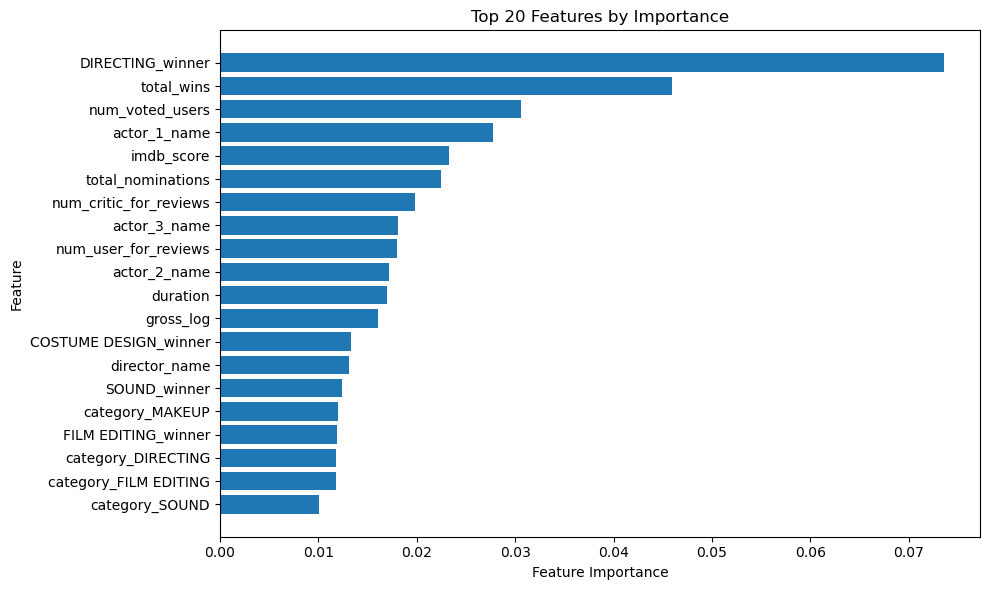

In [124]:
# Get the names of the top k features
top_feature_names = X.columns[top_features]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, importances_rf[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {k} Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()

In [125]:
# Assuming 'importances_rf' contains feature importances from RandomForestClassifier
k = 10  # Number of top features to select
top_features = importances_rf.argsort()[-k:][::-1]  # Indices of top k features
top_features

array([138, 240,   5,   4,   8, 239,   1,   6,   7,   3], dtype=int64)

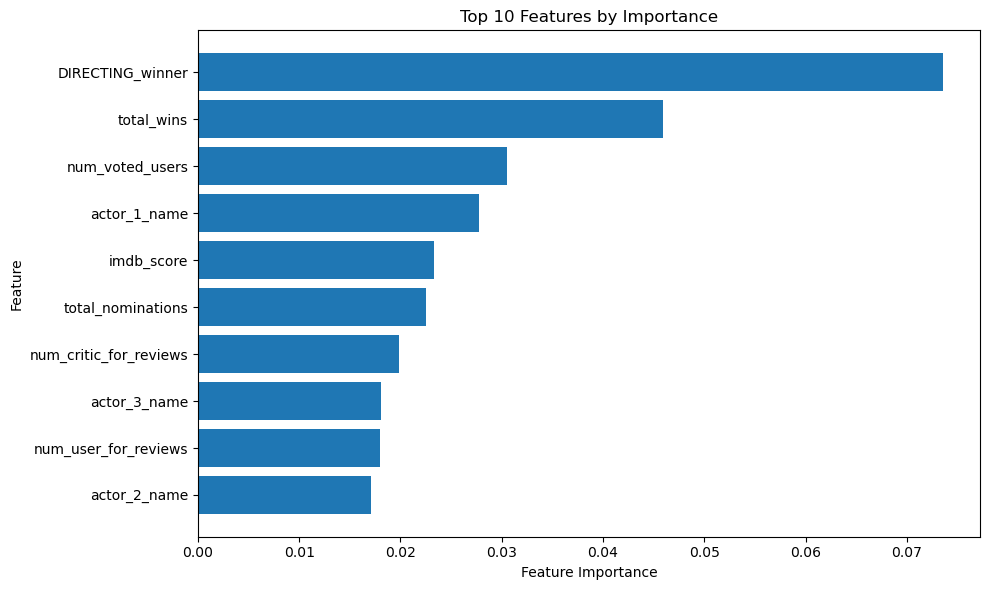

In [126]:
# Get the names of the top k features
top_feature_names = X.columns[top_features]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names, importances_rf[top_features])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title(f'Top {k} Features by Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()

C:\Users\chubb\AppData\Local\Temp\ipykernel_24092\3569898430.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df.drop(columns=['actor_1_name','actor_2_name','actor_3_name'],inplace=True)


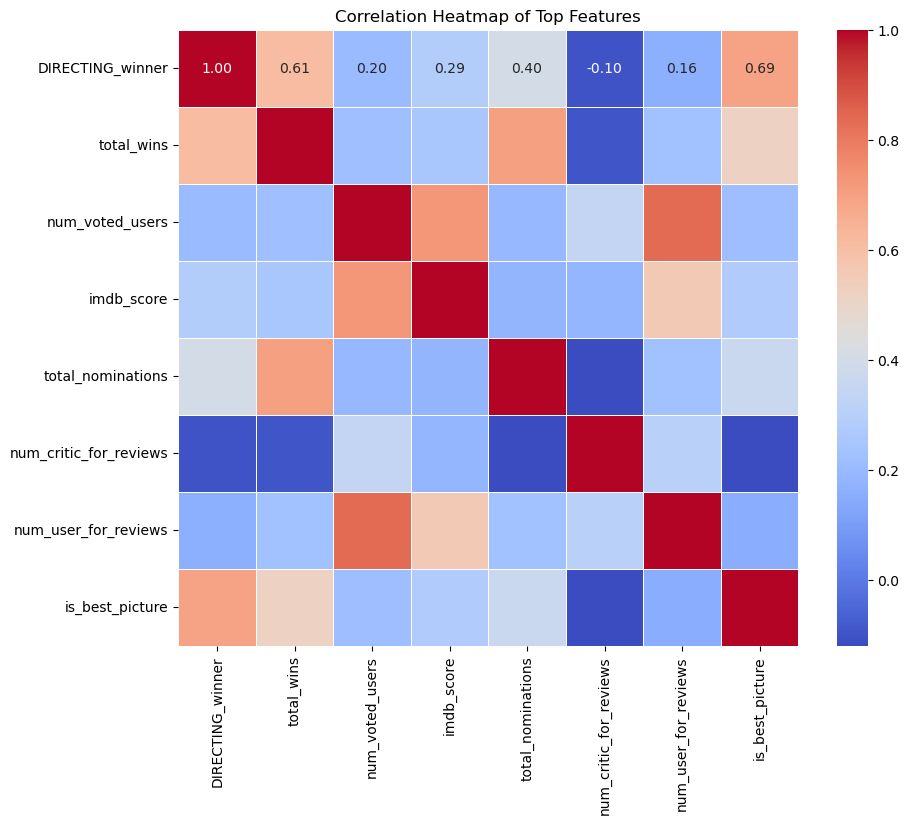

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming top_features is the indices of the top features
top_feature_names = X.columns[top_features]
top_feature_names = list(top_feature_names)

# Append the target variable 'is_best_picture'
top_feature_names.append('is_best_picture')
top_feature_names

# Select columns from the DataFrame
selected_features_df = features_df[top_feature_names]
selected_features_df.drop(columns=['actor_1_name','actor_2_name','actor_3_name'],inplace=True)
# Compute the correlation matrix
correlation_matrix = selected_features_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Top Features')
plt.show()


In [129]:
selected_features_df

DIRECTING_winner  total_wins  num_voted_users  imdb_score  \
0                   0           3           886204         7.9   
1                   1          11           793059         7.7   
2                   0           2           544884         8.3   
3                   0           3           665575         8.3   
4                   0           5           245333         7.5   
..                ...         ...              ...         ...   
201                 0           0           111658         7.2   
203                 0           0            70336         7.3   
204                 0           0            32415         7.5   
206                 1           2           375240         8.1   
209                 0           0            63839         7.5   

     total_nominations  num_critic_for_reviews  num_user_for_reviews  \
0                  8.0                   723.0                3054.0   
1                 15.0                   315.0                2528.0   
2                  4.0                   453.0                 733.0   
3                  5.0                   408.0                 704.0   
4                 10.0                   682.0                 678.0   
..                 ...                     ...                   ...   
201                3.0                   365.0                 297.0   
203                3.0                   663.0                 269.0   
204                4.0                   179.0                 510.0   
206                8.0                   141.0                 542.0   
209                4.0                   100.0                 238.0   

     is_best_picture  
0                  0  
1                  1  
2                  0  
3                  0  
4                  0  
..               ...  
201                0  
203                0  
204                0  
206                1  
209                0  

[191 rows x 8 columns]

In [130]:
# Check for duplicate rows
duplicates = selected_features_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the result
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 3


In [131]:
# Drop duplicate rows
selected_features_df = selected_features_df.drop_duplicates()

# Verify that duplicates are dropped by checking the shape of the DataFrame
print("Shape after dropping duplicates:", selected_features_df.shape)


Shape after dropping duplicates: (188, 8)


# Model Implementation and Baseline Evaluation

In [132]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame containing features and the target variable

# Step 1: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(selected_features_df.drop('is_best_picture', axis=1), selected_features_df['is_best_picture'])

# Step 2: Split the balanced DataFrame into features (X) and the target variable (y)
X = pd.DataFrame(X_resampled, columns=selected_features_df.drop('is_best_picture', axis=1).columns)
y = pd.Series(y_resampled)

# Step 3: Further split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you have X_train, X_test, y_train, and y_test ready for model training and evaluation


In [133]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create pipelines for each model
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

# Fit each pipeline to the training data
logistic_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Predictions
logistic_preds = logistic_pipeline.predict(X_test)
knn_preds = knn_pipeline.predict(X_test)
rf_preds = rf_pipeline.predict(X_test)

# Evaluate the accuracy of each model
logistic_accuracy = accuracy_score(y_test, logistic_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Logistic Regression Accuracy: 0.8305084745762712
KNN Accuracy: 0.864406779661017
Random Forest Accuracy: 0.8135593220338984


Logistic Regression - Accuracy: 0.8305084745762712
KNN - Accuracy: 0.864406779661017
Random Forest - Accuracy: 0.8135593220338984
Logistic Regression - Precision: 0.8333333333333334
KNN - Precision: 0.8235294117647058
Random Forest - Precision: 0.7878787878787878
Logistic Regression - Recall: 0.8333333333333334
KNN - Recall: 0.9333333333333333
Random Forest - Recall: 0.8666666666666667
Logistic Regression - AUC: 0.8999999999999999
KNN - AUC: 0.9339080459770115
Random Forest - AUC: 0.9195402298850575


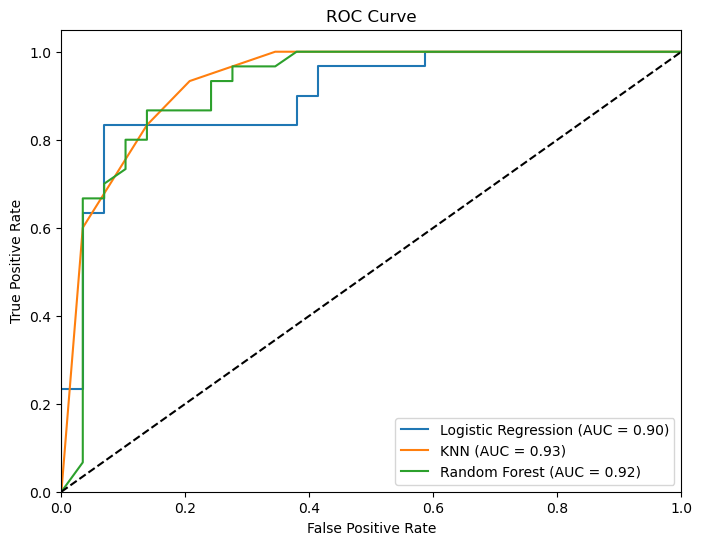

In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predictions on test data
lr_pred = logistic_pipeline.predict(X_test)
knn_pred = knn_pipeline.predict(X_test)
rf_pred = rf_pipeline.predict(X_test)

# Accuracy scores
lr_accuracy = accuracy_score(y_test, lr_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Logistic Regression - Accuracy:", lr_accuracy)
print("KNN - Accuracy:", knn_accuracy)
print("Random Forest - Accuracy:", rf_accuracy)

# Precision scores
lr_precision = precision_score(y_test, lr_pred)
knn_precision = precision_score(y_test, knn_pred)
rf_precision = precision_score(y_test, rf_pred)

print("Logistic Regression - Precision:", lr_precision)
print("KNN - Precision:", knn_precision)
print("Random Forest - Precision:", rf_precision)

# Recall scores
lr_recall = recall_score(y_test, lr_pred)
knn_recall = recall_score(y_test, knn_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Logistic Regression - Recall:", lr_recall)
print("KNN - Recall:", knn_recall)
print("Random Forest - Recall:", rf_recall)

# ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, logistic_pipeline.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_pipeline.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pipeline.predict_proba(X_test)[:,1])

# AUC scores
lr_auc = roc_auc_score(y_test, logistic_pipeline.predict_proba(X_test)[:,1])
knn_auc = roc_auc_score(y_test, knn_pipeline.predict_proba(X_test)[:,1])
rf_auc = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:,1])

print("Logistic Regression - AUC:", lr_auc)
print("KNN - AUC:", knn_auc)
print("Random Forest - AUC:", rf_auc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [135]:
from sklearn.metrics import f1_score

# F1 scores
lr_f1 = f1_score(y_test, lr_pred)
knn_f1 = f1_score(y_test, knn_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Logistic Regression - F1 Score:", lr_f1)
print("KNN - F1 Score:", knn_f1)
print("Random Forest - F1 Score:", rf_f1)

Logistic Regression - F1 Score: 0.8333333333333334
KNN - F1 Score: 0.8749999999999999
Random Forest - F1 Score: 0.8253968253968254


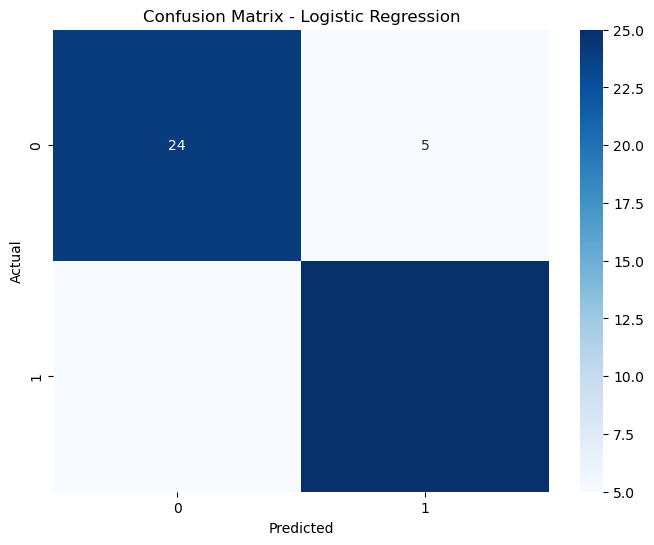

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

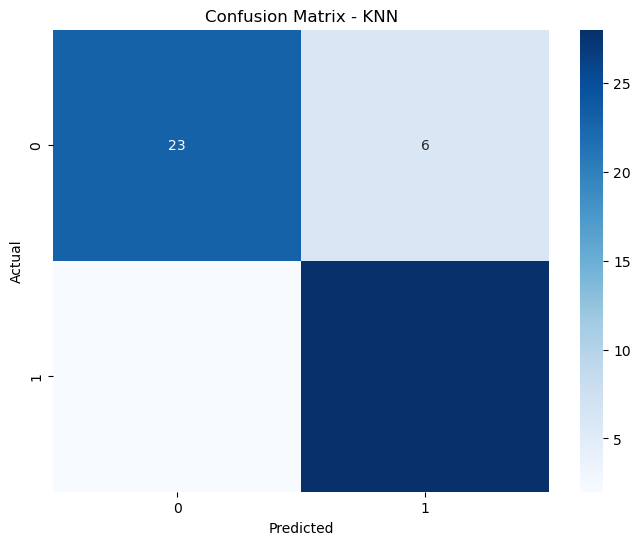

In [137]:
# Compute confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


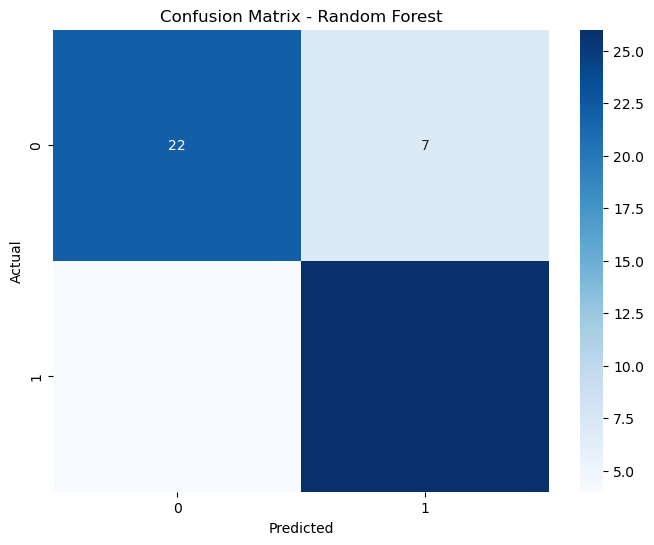

In [138]:
# Compute confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Hyperparameter Tuning

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define pipelines for each classifier
pipe_lr = Pipeline([('imputer', SimpleImputer()), ('scaler', StandardScaler()), ('clf', LogisticRegression())])
pipe_knn = Pipeline([('imputer', SimpleImputer()), ('scaler', StandardScaler()), ('clf', KNeighborsClassifier())])
pipe_rf = Pipeline([('imputer', SimpleImputer()), ('clf', RandomForestClassifier())])

# Define parameter grids for each classifier
param_grid_lr = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_knn = {'clf__n_neighbors': [3, 5, 7, 9, 11]}
param_grid_rf = {'clf__n_estimators': [50, 100, 150, 200], 'clf__max_depth': [None, 10, 20, 30]}

# Create grid search objects for each classifier
grid_search_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5)
grid_search_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)
grid_search_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5)

# Fit the grid search objects
grid_search_lr.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)

# Get best parameters and scores
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Logistic Regression - Best Parameters:", best_params_lr)
print("Logistic Regression - Best Score:", best_score_lr)

print("KNN - Best Parameters:", best_params_knn)
print("KNN - Best Score:", best_score_knn)

print("Random Forest - Best Parameters:", best_params_rf)
print("Random Forest - Best Score:", best_score_rf)


Logistic Regression - Best Parameters: {'clf__C': 1}
Logistic Regression - Best Score: 0.8170212765957447
KNN - Best Parameters: {'clf__n_neighbors': 5}
KNN - Best Score: 0.8425531914893616
Random Forest - Best Parameters: {'clf__max_depth': 30, 'clf__n_estimators': 100}
Random Forest - Best Score: 0.8723404255319149


Logistic Regression - Accuracy: 0.8305084745762712
KNN - Accuracy: 0.864406779661017
Random Forest - Accuracy: 0.7966101694915254
Logistic Regression - Precision: 0.8333333333333334
KNN - Precision: 0.8235294117647058
Random Forest - Precision: 0.7647058823529411
Logistic Regression - Recall: 0.8333333333333334
KNN - Recall: 0.9333333333333333
Random Forest - Recall: 0.8666666666666667
Logistic Regression - AUC: 0.8999999999999999
KNN - AUC: 0.9339080459770115
Random Forest - AUC: 0.9224137931034483


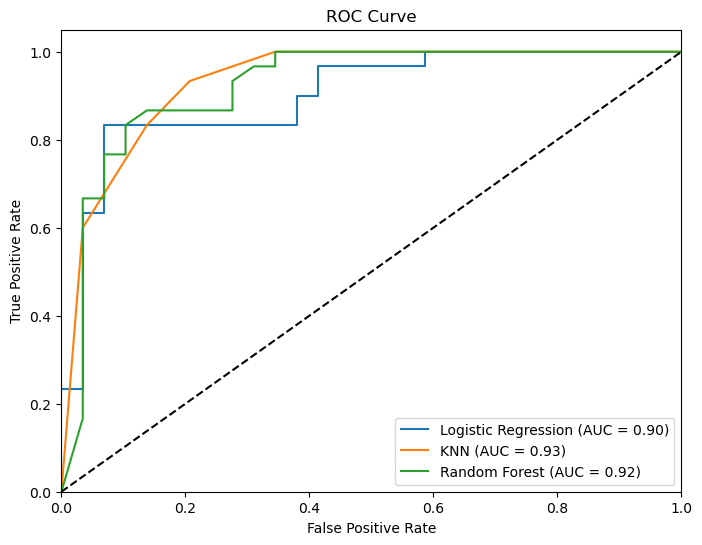

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predictions on test data
lr_pred = grid_search_lr.predict(X_test)
knn_pred = grid_search_knn.predict(X_test)
rf_pred = grid_search_rf.predict(X_test)

# Accuracy scores
lr_accuracy = accuracy_score(y_test, lr_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Logistic Regression - Accuracy:", lr_accuracy)
print("KNN - Accuracy:", knn_accuracy)
print("Random Forest - Accuracy:", rf_accuracy)

# Precision scores
lr_precision = precision_score(y_test, lr_pred)
knn_precision = precision_score(y_test, knn_pred)
rf_precision = precision_score(y_test, rf_pred)

print("Logistic Regression - Precision:", lr_precision)
print("KNN - Precision:", knn_precision)
print("Random Forest - Precision:", rf_precision)

# Recall scores
lr_recall = recall_score(y_test, lr_pred)
knn_recall = recall_score(y_test, knn_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Logistic Regression - Recall:", lr_recall)
print("KNN - Recall:", knn_recall)
print("Random Forest - Recall:", rf_recall)

# ROC curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, grid_search_lr.predict_proba(X_test)[:,1])
knn_fpr, knn_tpr, _ = roc_curve(y_test, grid_search_knn.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, grid_search_rf.predict_proba(X_test)[:,1])

# AUC scores
lr_auc = roc_auc_score(y_test, grid_search_lr.predict_proba(X_test)[:,1])
knn_auc = roc_auc_score(y_test, grid_search_knn.predict_proba(X_test)[:,1])
rf_auc = roc_auc_score(y_test, grid_search_rf.predict_proba(X_test)[:,1])

print("Logistic Regression - AUC:", lr_auc)
print("KNN - AUC:", knn_auc)
print("Random Forest - AUC:", rf_auc)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUC = {:.2f})'.format(lr_auc))
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = {:.2f})'.format(knn_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [141]:
from sklearn.metrics import f1_score

# F1 scores
lr_f1 = f1_score(y_test, lr_pred)
knn_f1 = f1_score(y_test, knn_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Logistic Regression - F1 Score:", lr_f1)
print("KNN - F1 Score:", knn_f1)
print("Random Forest - F1 Score:", rf_f1)


Logistic Regression - F1 Score: 0.8333333333333334
KNN - F1 Score: 0.8749999999999999
Random Forest - F1 Score: 0.8125


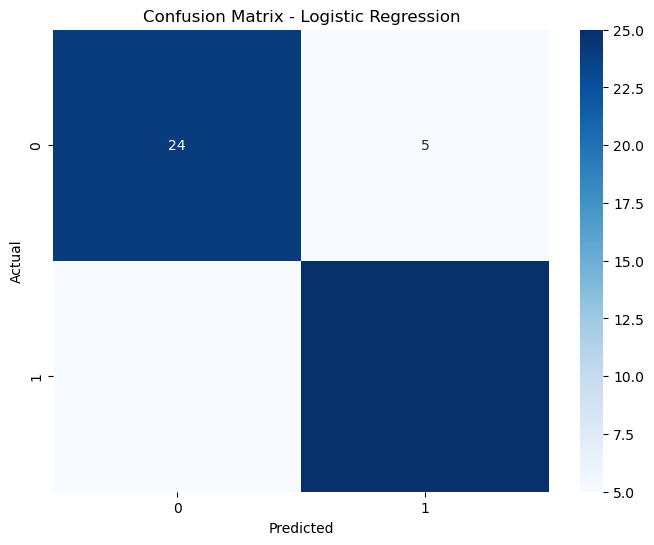

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


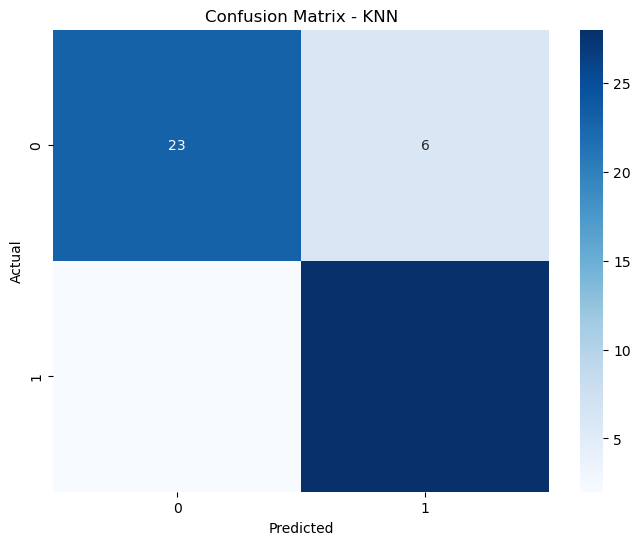

In [143]:
# Compute confusion matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)

# Plot confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()


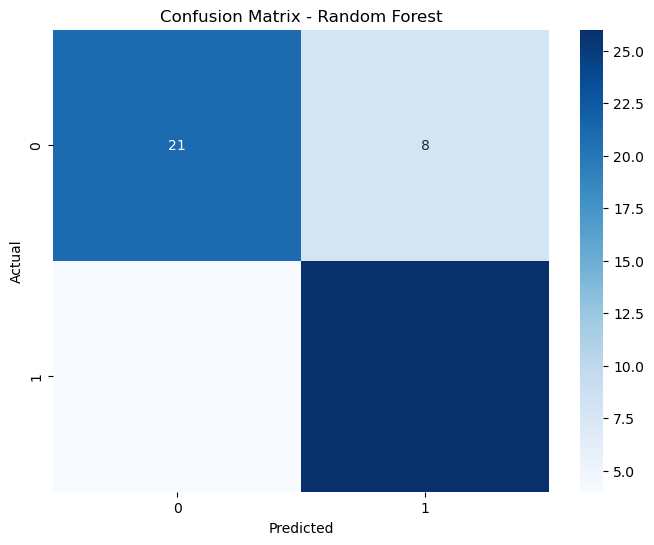

In [144]:
# Compute confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Exploratory Data Analysis Contd.

In [145]:
selected_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DIRECTING_winner        188 non-null    int32  
 1   total_wins              188 non-null    int64  
 2   num_voted_users         188 non-null    int64  
 3   imdb_score              188 non-null    float64
 4   total_nominations       188 non-null    float64
 5   num_critic_for_reviews  188 non-null    float64
 6   num_user_for_reviews    188 non-null    float64
 7   is_best_picture         188 non-null    int64  
dtypes: float64(4), int32(1), int64(3)
memory usage: 12.5 KB


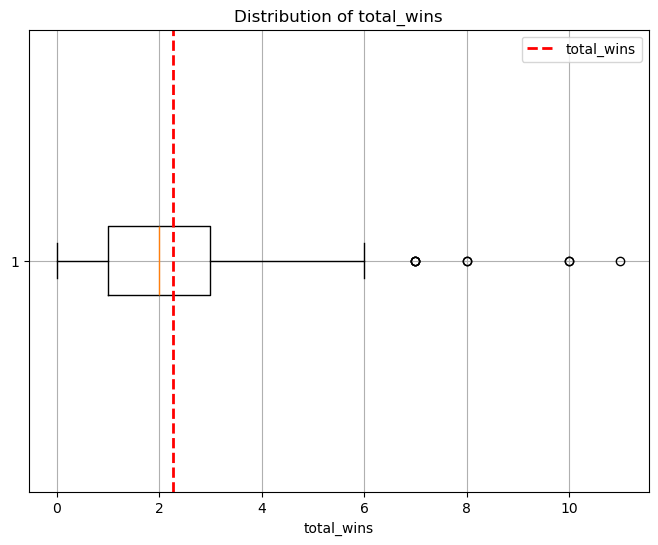

In [146]:
plt.figure(figsize=(8, 6))
plt.boxplot(selected_features_df['total_wins'], vert=False)
plt.title('Distribution of total_wins')
plt.xlabel('total_wins')
plt.grid(True)

# Add vertical line for mean
mean_gross = selected_features_df['total_wins'].mean()
plt.axvline(mean_gross, color='red', linestyle='dashed', linewidth=2, label='total_wins')

plt.legend()
plt.show()

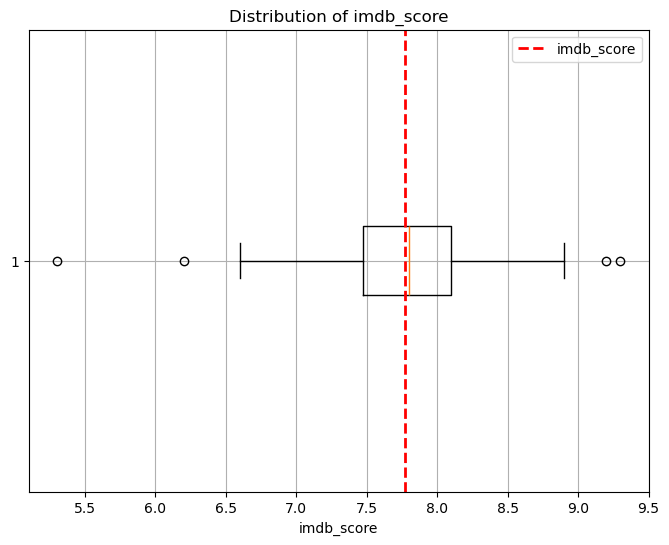

In [147]:
plt.figure(figsize=(8, 6))
plt.boxplot(selected_features_df['imdb_score'], vert=False)
plt.title('Distribution of imdb_score')
plt.xlabel('imdb_score')
plt.grid(True)

# Add vertical line for mean
mean_gross = selected_features_df['imdb_score'].mean()
plt.axvline(mean_gross, color='red', linestyle='dashed', linewidth=2, label='imdb_score')

plt.legend()
plt.show()

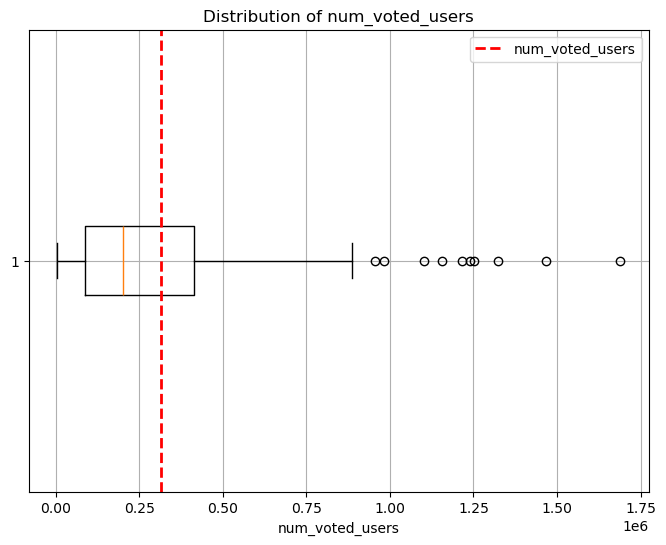

In [148]:
plt.figure(figsize=(8, 6))
plt.boxplot(selected_features_df['num_voted_users'], vert=False)
plt.title('Distribution of num_voted_users')
plt.xlabel('num_voted_users')
plt.grid(True)

# Add vertical line for mean
mean_gross = selected_features_df['num_voted_users'].mean()
plt.axvline(mean_gross, color='red', linestyle='dashed', linewidth=2, label='num_voted_users')

plt.legend()
plt.show()

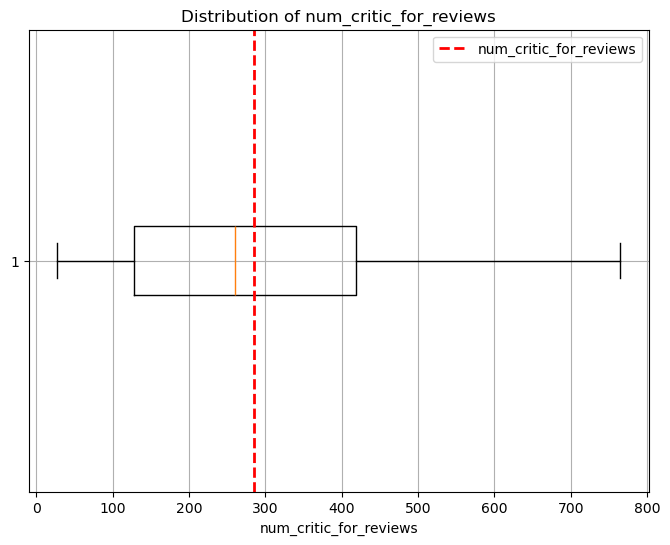

In [149]:
plt.figure(figsize=(8, 6))
plt.boxplot(selected_features_df['num_critic_for_reviews'], vert=False)
plt.title('Distribution of num_critic_for_reviews')
plt.xlabel('num_critic_for_reviews')
plt.grid(True)

# Add vertical line for mean
mean_gross = selected_features_df['num_critic_for_reviews'].mean()
plt.axvline(mean_gross, color='red', linestyle='dashed', linewidth=2, label='num_critic_for_reviews')

plt.legend()
plt.show()